In [353]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [354]:
mouse = 'reach1_4'

In [355]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [361]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
mthal_neural_data = neural_data_transposed
mthal_neural_data_original = neural_data

(538, 61160)
(61160, 538)


load neural data (train and test)

In [362]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

In [363]:
48928 + 12232

61160

load cebra models and make embeddings

In [364]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [365]:

# We get train set embedding and test set embedding.
cebra_posdir_model_mthal = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train_mthal = cebra_posdir_model_mthal.transform(neural_train)
cebra_posdir_test_mthal = cebra_posdir_model_mthal.transform(neural_test)

cebra_pos_model_mthal = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model_mthal.transform(neural_train)
cebra_pos_test = cebra_pos_model_mthal.transform(neural_test)

cebra_dir_model_mthal = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train_mthal = cebra_dir_model_mthal.transform(neural_train)
cebra_dir_test_mthal = cebra_dir_model_mthal.transform(neural_test)

cebra_pos_all_mthal = cebra_pos_model_mthal.transform(neural_data_transposed)
cebra_dir_all_mthal = cebra_dir_model_mthal.transform(neural_data_transposed)
cebra_posdir_all_mthal = cebra_posdir_model_mthal.transform(neural_data_transposed)

load discerte_lables 

In [366]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(array([0., 1., 2.]), array([0., 1.]))

preview embeddings

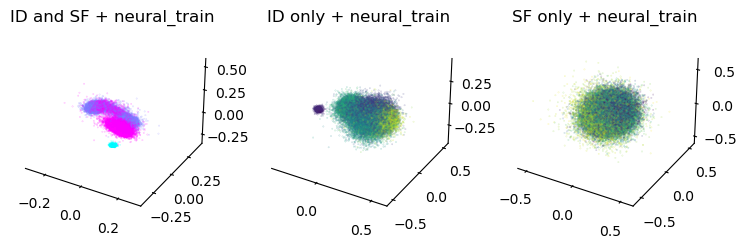

In [367]:

fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')
ax3=plt.subplot(233, projection = '3d')


ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_all_mthal, embedding_labels=discete_lables[:,0], title='ID and SF + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all_mthal, embedding_labels='time', title='ID only + neural_train')
ax3=cebra.plot_embedding(ax=ax3, embedding=cebra_dir_all_mthal, embedding_labels='time', title='SF only + neural_train')


# ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=label_train[:,0], title='ID only + all neural_data')

plt.show()


load cebra-time models (not trained with lables)

Text(0.5, 0.98, 'CEBRA-Time Model, Mthal')

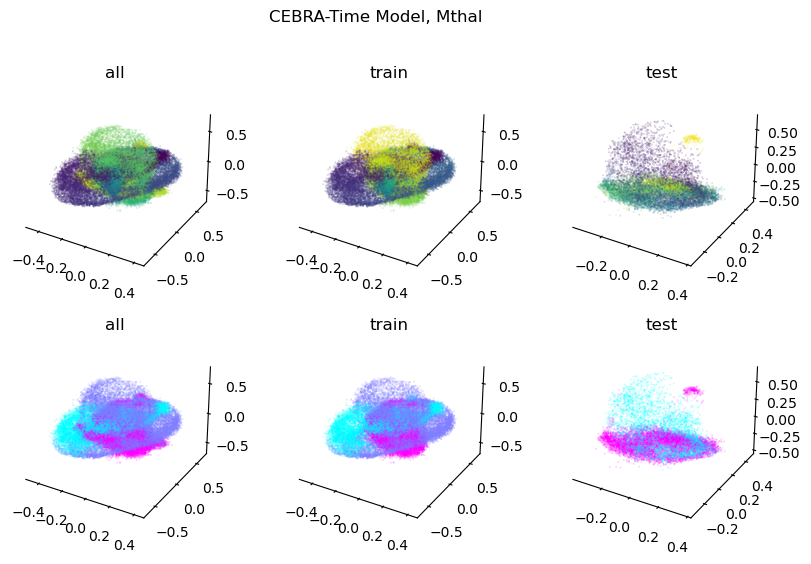

In [368]:
path_0 = "reach1_4_50msFr_0.001LR_1000MI_outDim32_B_2024-03-29_19-31-13_timeOnly.cebra"
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim32_B_2024-04-02_13-07-00_timeOnly.cebra'

cebra_time_model_mthal = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all_mthal = cebra_time_model_mthal.transform(neural_data_transposed)
cebra_time_train_mthal = cebra_time_model_mthal.transform(neural_train)
cebra_time_test_mthal = cebra_time_model_mthal.transform(neural_test)


plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all_mthal, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train_mthal, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test_mthal, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all_mthal, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train_mthal, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test_mthal, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

cebra-hybrid model

Text(0.5, 0.98, 'CEBRA Hybrid Model')

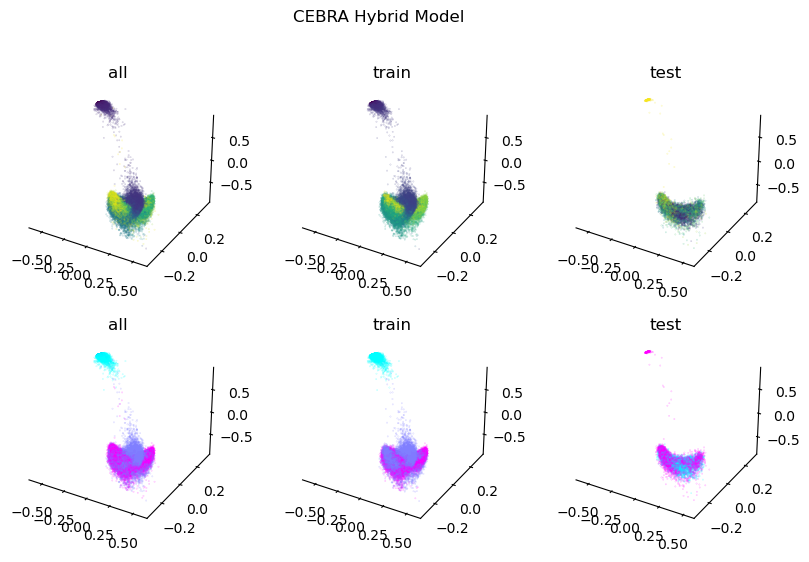

In [369]:

path = r"C:\Users\user\Documents\github\RNN_reaching_task\cebra_models\reach1_4\02\B\cebra_trialID_hybrid_model_1000_32_reach1_4_B_2024-05-06_19-55-50.pt"

# cebra_pos_hybrid_model = cebra.CEBRA.load(f"decoding_models/cebra_trialID_hybrid_model_{MI}_{OD}_{M}_{P}_{current_datetime}.pt")
cebra_pos_hybrid_model_mthal = cebra.CEBRA.load(path)

cebra_hybrid_all_mthal = cebra_pos_hybrid_model_mthal.transform(neural_data_transposed)
cebra_pos_hybrid_train_mthal = cebra_pos_hybrid_model_mthal.transform(neural_train)
cebra_pos_hybrid_test_mthal = cebra_pos_hybrid_model_mthal.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_hybrid_all_mthal, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_pos_hybrid_train_mthal, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_pos_hybrid_test_mthal, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_hybrid_all_mthal, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_pos_hybrid_train_mthal, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_pos_hybrid_test_mthal, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA Hybrid Model')

In [370]:
mthal_embedding_train = cebra_pos_hybrid_train_mthal
mthal_embedding_all = cebra_hybrid_all_mthal
# mthal_embedding_all= cebra_time_all_mthal
# mthal_embedding_train = cebra_time_train_mthal


### 1.2 Load in M1 data 


In [371]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [372]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
m1_neural_data = neural_data_transposed
m1_neural_data_orignal = neural_data

(45, 61160)
(61160, 45)


load neural_data (test and train)

In [373]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 45), (12232, 45), (48928, 2), (12232, 2))

load cebra models and make embeddings

In [374]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'A' # probe letter

In [375]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0., 1., 2.]), array([0., 1.]))

In [376]:
MI, OD, mouse, P
MI = 5000
neural_train.shape

(48928, 45)

In [377]:
# We get train set embedding and test set embedding.
cebra_posdir_model_m1 =  cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_posdir_train_m1 = cebra_posdir_model_m1.transform(neural_train)
cebra_posdir_test_m1 = cebra_posdir_model_m1.transform(neural_test)

cebra_pos_model_m1 = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train_m1 = cebra_pos_model_m1.transform(neural_train)
cebra_pos_test_m1 = cebra_pos_model_m1.transform(neural_test)

cebra_dir_model_m1  =cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train_m1 = cebra_dir_model_m1.transform(neural_train)
cebra_dir_test_m1 = cebra_dir_model_m1.transform(neural_test)

cebra_pos_all_m1 = cebra_pos_model_m1.transform(neural_data_transposed)
cebra_dir_all_m1 = cebra_dir_model_m1.transform(neural_data_transposed)
cebra_posdir_all_m1 = cebra_posdir_model_m1.transform(neural_data_transposed)

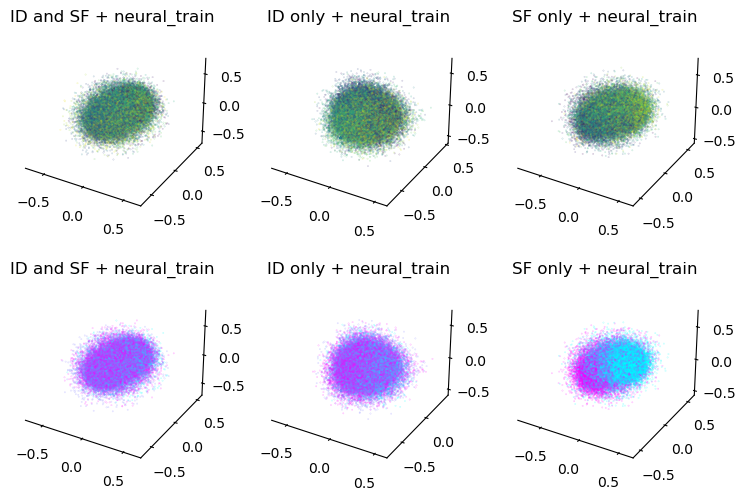

In [378]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')
ax3=plt.subplot(233, projection = '3d')

ax4=plt.subplot(234, projection = '3d')
ax5=plt.subplot(235, projection = '3d')
ax6=plt.subplot(236, projection = '3d')


ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_all_m1, embedding_labels='time', title='ID and SF + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all_m1, embedding_labels='time', title='ID only + neural_train')
ax3=cebra.plot_embedding(ax=ax3, embedding=cebra_dir_all_m1, embedding_labels='time', title='SF only + neural_train')

ax4=cebra.plot_embedding(ax=ax4, embedding=cebra_posdir_train_m1, embedding_labels=label_train[:,0], title='ID and SF + neural_train')
ax5=cebra.plot_embedding(ax=ax5, embedding=cebra_pos_train_m1, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax6=cebra.plot_embedding(ax=ax6, embedding=cebra_dir_train_m1, embedding_labels=label_train[:,1], title='SF only + neural_train')


# ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=label_train[:,0], title='ID only + all neural_data')


cebra-hybrid model

Text(0.5, 0.98, 'CEBRA Hybrid Model')

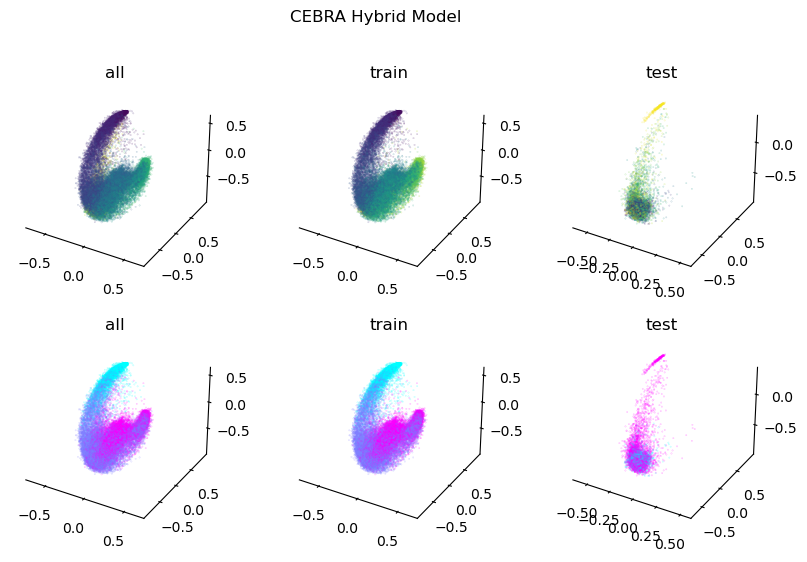

In [379]:
MI = 1000
OD = 32
current_datetime = '2024-05-06_19-41-47'
path = r"C:\Users\user\Documents\github\RNN_reaching_task\cebra_models\reach1_4\02\A\cebra_trialID_hybrid_model_1000_32_reach1_4_A_2024-05-06_19-41-47.pt"

# cebra_pos_hybrid_model = cebra.CEBRA.load(f"decoding_models/cebra_trialID_hybrid_model_{MI}_{OD}_{M}_{P}_{current_datetime}.pt")
cebra_pos_hybrid_model_m1 = cebra.CEBRA.load(path)

cebra_hybrid_all_m1 = cebra_pos_hybrid_model_m1.transform(neural_data_transposed)
cebra_pos_hybrid_train_m1 = cebra_pos_hybrid_model_m1.transform(neural_train)
cebra_pos_hybrid_test_m1 = cebra_pos_hybrid_model_m1.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_hybrid_all_m1, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_pos_hybrid_train_m1, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_pos_hybrid_test_m1, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_hybrid_all_m1, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_pos_hybrid_train_m1, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_pos_hybrid_test_m1, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA Hybrid Model')

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

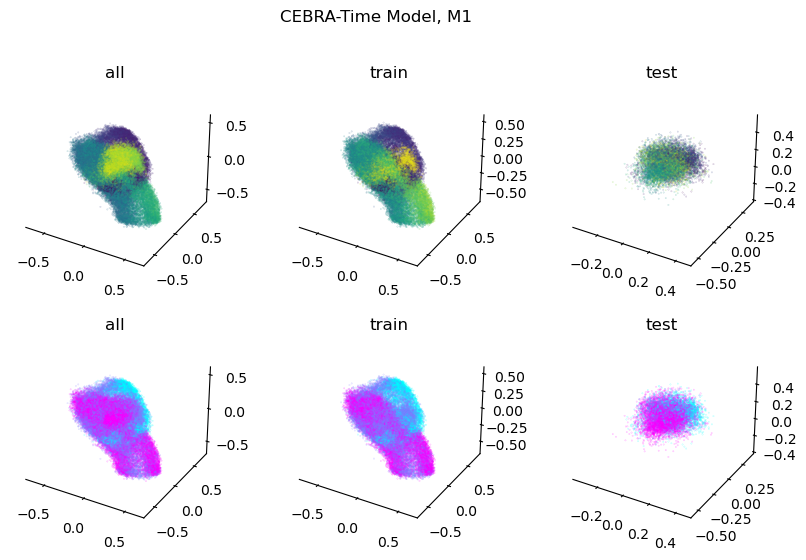

In [380]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'

cebra_time_model_m1 = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all_m1 = cebra_time_model_m1.transform(neural_data_transposed)
cebra_time_train_m1 = cebra_time_model_m1.transform(neural_train)
cebra_time_test_m1 = cebra_time_model_m1.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all_m1, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train_m1, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test_m1, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all_m1, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train_m1, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test_m1, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, M1')

Set what embeddings to use

In [381]:
# m1_embedding_train = cebra_time_train_m1
# m1_embedding_all = cebra_time_all_m1

m1_embedding_train= cebra_pos_hybrid_train_m1
m1_embedding_all = cebra_hybrid_all_m1


In [382]:
mthal_embedding_train = cebra_pos_hybrid_train_mthal
mthal_embedding_all = cebra_hybrid_all_mthal
# mthal_embedding_all= cebra_time_all_mthal
# mthal_embedding_train = cebra_time_train_mthal

Double check what you using to train the rnn

Text(0.5, 0.98, 'checking embeddings used to train')

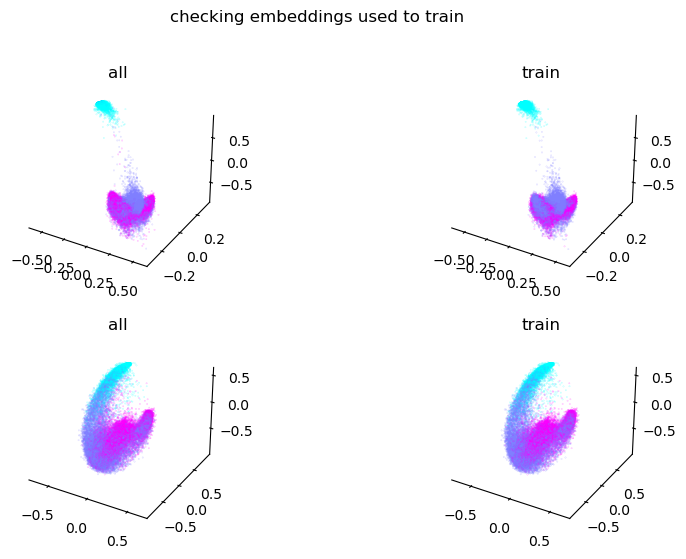

In [383]:

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=mthal_embedding_all, embedding_labels=discete_lables[:,0], title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=mthal_embedding_train, embedding_labels=label_train[:,0], title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=m1_embedding_all, embedding_labels=discete_lables[:,0], title='all')
ax4 = cebra.plot_embedding(ax=ax4,embedding=m1_embedding_train, embedding_labels=label_train[:,0], title='train')

# add title
plt.suptitle('checking embeddings used to train')

### 4. Convert Data into correctly shapped df

Turning neural_data and embedding data into to a df that is time bins by units for neural data. Or timebins by embeddings for embedding data
- you need each row to be a single time bin
- each column is a unit. 


In [384]:
mthal_neural_data_original

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [20.,  0., 40., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [385]:
# Conver neural data into a df that is (bins , features) = (units, timebins)
data_mthal_neuralData_T = mthal_neural_data_original.T
data_mthal_neuralData = pd.DataFrame(data_mthal_neuralData_T)
data_mthal_neuralData = data_mthal_neuralData.ffill()
print(data_mthal_neuralData.shape)
data_mthal_neuralData.head(2)

(61160, 538)


0    1    2    3     4     5     6    7    8    9    ...  528   529  530  \
0  0.0  0.0  0.0  0.0  40.0  20.0  40.0  0.0  0.0  0.0  ...  0.0  20.0  0.0   
1  0.0  0.0  0.0  0.0  40.0  20.0   0.0  0.0  0.0  0.0  ...  0.0   0.0  0.0   

   531  532  533  534   535  536  537  
0  0.0  0.0  0.0  0.0  20.0  0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  

[2 rows x 538 columns]

In [386]:
# Conver neural data into a df that is (bins , features) = (units, timebins)\
data_m1_neuralData_T = m1_neural_data_orignal.T
data_m1_neuralData = pd.DataFrame(data_m1_neuralData_T)
data_m1_neuralData = data_m1_neuralData.ffill()
print(data_m1_neuralData.shape)
data_m1_neuralData.head(2)

(61160, 45)


0     1     2    3     4     5     6     7    8    9   ...   35   36  \
0   0.0  40.0  80.0  0.0  60.0  20.0  80.0  20.0  0.0  0.0  ...  0.0  0.0   
1  20.0  80.0  40.0  0.0  40.0   0.0  80.0  20.0  0.0  0.0  ...  0.0  0.0   

    37   38   39   40   41   42   43   44  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 45 columns]

embeddings

In [387]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_m1_embedding_T = m1_embedding_all
data_m1_embedding = pd.DataFrame(data_m1_embedding_T)
data_m1_embedding = data_m1_embedding.ffill()
print(data_m1_embedding.shape)
data_m1_embedding.head(2)

(61160, 32)


0         1         2         3         4         5         6   \
0 -0.454253  0.862097  0.194928  0.047357  0.007880 -0.021215 -0.009572   
1 -0.457240  0.861635  0.193384  0.043953  0.009694 -0.029396 -0.007318   

         7         8         9   ...        22        23        24        25  \
0  0.002567  0.007730 -0.003114  ...  0.050220 -0.024683  0.009622 -0.003141   
1  0.005603  0.003567 -0.006776  ...  0.048458 -0.015014  0.001313 -0.003342   

         26        27        28        29        30        31  
0 -0.041788  0.013074 -0.022706 -0.011433  0.005581  0.001213  
1 -0.031753  0.005988 -0.016840 -0.005437  0.012562 -0.003714  

[2 rows x 32 columns]

In [388]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_mthal_embedding_T = mthal_embedding_all
data_mthal_embedding = pd.DataFrame(data_mthal_embedding_T)
data_mthal_embedding = data_mthal_embedding.ffill()
print(data_mthal_embedding.shape)
data_mthal_embedding.head(2)

(61160, 32)


0         1         2         3         4         5         6   \
0 -0.540915  0.272055  0.791585  0.008111  0.022773 -0.000465 -0.002027   
1 -0.545528  0.277947  0.786769  0.010231  0.018645  0.004690 -0.011458   

         7         8         9   ...        22        23        24        25  \
0 -0.003984 -0.003942 -0.012587  ...  0.008034  0.001993  0.018658  0.005532   
1  0.003095 -0.005570 -0.018401  ...  0.006860  0.009781  0.021173  0.003166   

         26        27        28        29        30        31  
0  0.019502  0.000700 -0.006601 -0.026672 -0.009521  0.023940  
1  0.019622 -0.003745  0.004988 -0.011537 -0.019621  0.014081  

[2 rows x 32 columns]

<Axes3D: title={'center': 'ID only + neural_train'}>

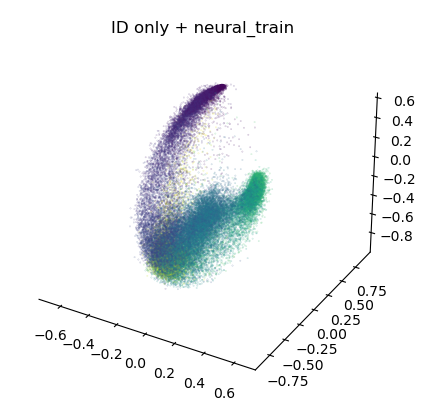

In [389]:
data_m1_embedding_T
cebra.plot_embedding(embedding=data_m1_embedding_T, embedding_labels='time', title='ID only + neural_train')

Covert which dataframes you want into data, so it can be fit into rest of code

In [390]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

In [391]:
data_mthal_embedding[0].to_numpy().shape

(61160,)

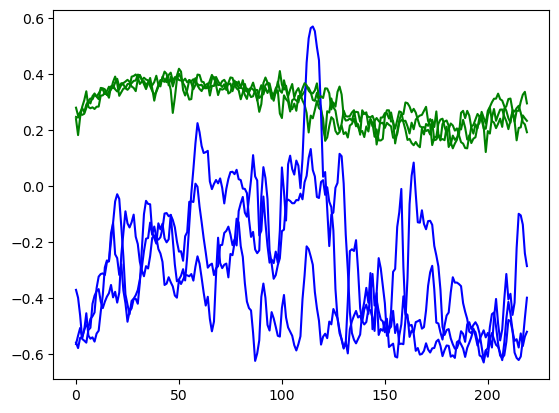

In [392]:
embedding_mthal = data_mthal_embedding[0].to_numpy()[11000:11220] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[11000:11220] # pert1
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
embedding_mthal = data_mthal_embedding[0].to_numpy()[11220:11440] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[11220:11440] # pert1
# embedding_5 = data_mthal_embedding[0].to_numpy()[25200:31500] # wash3
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
embedding_mthal = data_mthal_embedding[0].to_numpy()[11440:11660] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[11440:11660] # pert1
# embedding_5 = data_mthal_embedding[0].to_numpy()[25200:31500] # wash3
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
# plt.plot(embedding_3,color='red')

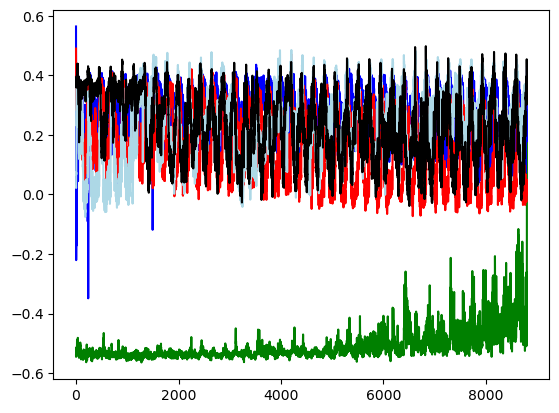

In [393]:
bins_per_trail = 220 * 40

embedding_1 = data_mthal_embedding[0].to_numpy()[0*bins_per_trail:bins_per_trail] #base
embedding_2 = data_mthal_embedding[0].to_numpy()[bins_per_trail:bins_per_trail*2] # pert1
embedding_3 = data_mthal_embedding[0].to_numpy()[bins_per_trail*2:bins_per_trail*3] # wash1
embedding_4 = data_mthal_embedding[0].to_numpy()[bins_per_trail*3:bins_per_trail*4] # pert2
embedding_5 = data_mthal_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*5] # pert2
embedding_6 = data_mthal_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*6] # pert2


plt.plot(embedding_1,color='green')
plt.plot(embedding_2,color='blue')
plt.plot(embedding_3,color='red')
plt.plot(embedding_4,color='lightblue')
plt.plot(embedding_5,color='darkred')
plt.plot(embedding_6,color='black')
plt.show()

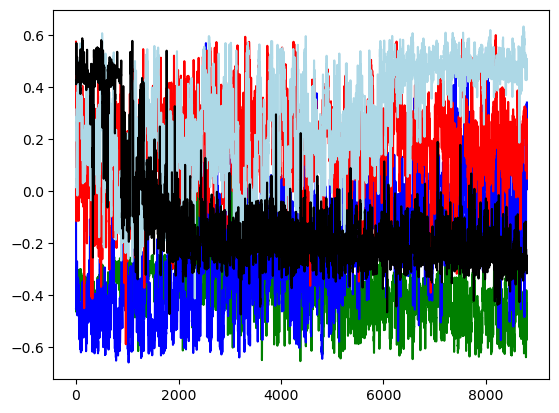

In [394]:
bins_per_trail = 220 * 40

embedding_1 = data_m1_embedding[0].to_numpy()[0*bins_per_trail:bins_per_trail] #base
embedding_2 = data_m1_embedding[0].to_numpy()[bins_per_trail:bins_per_trail*2] # pert1
embedding_3 = data_m1_embedding[0].to_numpy()[bins_per_trail*2:bins_per_trail*3] # wash1
embedding_4 = data_m1_embedding[0].to_numpy()[bins_per_trail*3:bins_per_trail*4] # pert2
embedding_5 = data_m1_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*5] # pert2
embedding_6 = data_m1_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*6] # pert2


plt.plot(embedding_1,color='green')
plt.plot(embedding_2,color='blue')
plt.plot(embedding_3,color='red')
plt.plot(embedding_4,color='lightblue')
plt.plot(embedding_5,color='darkred')
plt.plot(embedding_6,color='black')
plt.show()

check embeddings and FR of M1 and Mthal

In [395]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_units(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]


        unit_embedding = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        second_unit_embedding = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        third_unit_embedding = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]


        embedding_1 = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        embedding_2 = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        embedding_3 = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]

        
        embedding_1_m1 = data_m1_embedding[0].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = data_m1_embedding[1].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = data_m1_embedding[2].to_numpy()[reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1, label=f'Reach {reach}')
        ax5.plot(embedding_2, label=f'Reach {reach}')
        ax6.plot(embedding_3,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1, embedding_2, embedding_3, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Mtahl Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mtahl Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mtahl Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Mtahl First Embedding")
    ax5.set_title("Mtahl Second Embedding")
    ax6.set_title("Mtahl Third Embedding")

    ax7.set_title("M1 First Embedding")
    ax8.set_title("M1 Second Embedding")
    ax9.set_title("M1 Third Embedding")

    ax10.set_title("Mthal 3D Embedding")
    ax11.set_title("M1 3D Embedding")



    # Overall title for the figure
    fig.suptitle(f'Checking top 3 embeddings for M1 and Mthal at spefici reachs')

    # Show the plot
    plt.show()


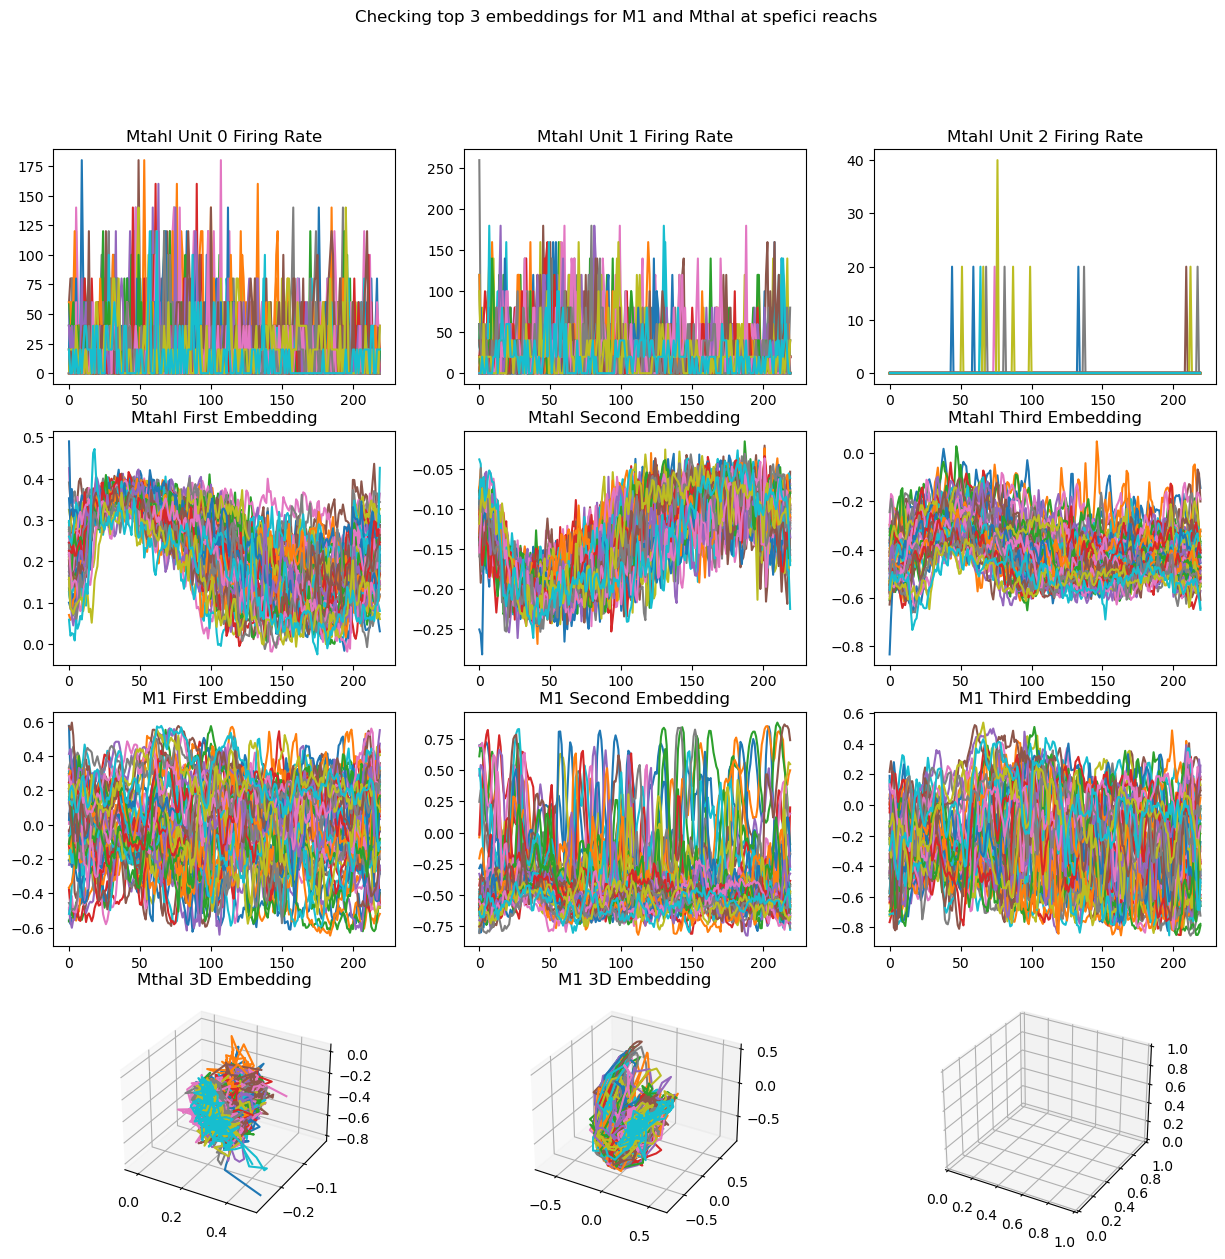

In [396]:
unit_to_view = 0
second_unit_to_view = 1  # Second unit to display
third_unit_to_view = 2
reaches_to_view = range(50, 100)  # Range of reaches to display
view_units(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view)

Convert Data frames into correct Input and Target Shapes

In [397]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

In [398]:
data_m1_embedding.head()

0         1         2         3         4         5         6   \
0 -0.454253  0.862097  0.194928  0.047357  0.007880 -0.021215 -0.009572   
1 -0.457240  0.861635  0.193384  0.043953  0.009694 -0.029396 -0.007318   
2 -0.464070  0.861558  0.188672  0.023203  0.003477 -0.017868 -0.013099   
3 -0.429803  0.874675  0.211706  0.021799  0.001017 -0.016733 -0.004751   
4 -0.435581  0.871346  0.218799  0.008388  0.001200 -0.009423  0.000422   

         7         8         9   ...        22        23        24        25  \
0  0.002567  0.007730 -0.003114  ...  0.050220 -0.024683  0.009622 -0.003141   
1  0.005603  0.003567 -0.006776  ...  0.048458 -0.015014  0.001313 -0.003342   
2 -0.001576 -0.002086 -0.004300  ...  0.032964 -0.009064  0.000393  0.002549   
3 -0.004001 -0.012601  0.004674  ...  0.017711 -0.011641  0.000794 -0.005317   
4 -0.010406 -0.004464  0.017432  ...  0.010445  0.002137 -0.006845 -0.003541   

         26        27        28        29        30        31  
0 -0.041788  0.013074 -0.022706 -0.011433  0.005581  0.001213  
1 -0.031753  0.005988 -0.016840 -0.005437  0.012562 -0.003714  
2 -0.012836 -0.000059 -0.014417 -0.013499  0.010676  0.001479  
3 -0.024525  0.014681 -0.014741 -0.008363  0.020436 -0.015384  
4 -0.020285 -0.000056  0.003831 -0.013867  0.013821 -0.000066  

[5 rows x 32 columns]

In [399]:
data_mthal_embedding.head()

0         1         2         3         4         5         6   \
0 -0.540915  0.272055  0.791585  0.008111  0.022773 -0.000465 -0.002027   
1 -0.545528  0.277947  0.786769  0.010231  0.018645  0.004690 -0.011458   
2 -0.538963  0.293836  0.784746  0.012984 -0.004279 -0.017624 -0.008157   
3 -0.533410  0.274905  0.790676  0.004772  0.015638  0.037121  0.003495   
4 -0.538624  0.252517  0.788425 -0.021312 -0.003169  0.012376 -0.015176   

         7         8         9   ...        22        23        24        25  \
0 -0.003984 -0.003942 -0.012587  ...  0.008034  0.001993  0.018658  0.005532   
1  0.003095 -0.005570 -0.018401  ...  0.006860  0.009781  0.021173  0.003166   
2  0.007128 -0.010327 -0.026173  ...  0.000187  0.006429  0.024213 -0.010759   
3 -0.006345 -0.020323 -0.009632  ...  0.021662 -0.003183 -0.012240  0.023436   
4  0.018644  0.035580  0.040268  ... -0.008334  0.030336  0.045109  0.004052   

         26        27        28        29        30        31  
0  0.019502  0.000700 -0.006601 -0.026672 -0.009521  0.023940  
1  0.019622 -0.003745  0.004988 -0.011537 -0.019621  0.014081  
2  0.010368 -0.008112 -0.004661 -0.027167  0.015344  0.002447  
3  0.008843 -0.010508  0.017023 -0.022003 -0.028083 -0.025836  
4 -0.006192  0.013247  0.048179  0.028163 -0.046423 -0.028287  

[5 rows x 32 columns]

Adapt the neural or embedding data into train, validate and test sets

In [400]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming data_mthal_embedding and data_m1_embedding are your DataFrame names:
PREDICTORS = data_mthal_embedding.columns  # These are all columns in the Mthal embedding DataFrame
TARGET = data_m1_embedding.columns  # These are all columns in the M1 embedding DataFrame


scale the data. take the mean of columns and find SD and so on

In [267]:
scale_taret = True

In [268]:
# # Initialize scaler
# scaler = StandardScaler()

# if scale_taret:
#     # Scale Mthal embedding data (predictors)
#     data_mthal_embedding_scaled = pd.DataFrame(scaler.fit_transform(data_mthal_embedding), columns=PREDICTORS)

# if scale_taret == False:
#     data_mthal_embedding_scaled = data_mthal_embedding
    
# # Optionally scale M1 embedding data (targets) if needed
# if scale_taret:
#     data_m1_embedding_scaled = pd.DataFrame(scaler.fit_transform(data_m1_embedding), columns=TARGET)
#     print('scaling Target Embeddings')

# # Use M1 embedding data as is if not scaling
# if scale_taret == False:
#     data_m1_embedding_scaled = data_m1_embedding  # Not scaled, just renaming for consistency in downstream code
#     print('Not scaling Target Embeddings')




Split scaled Data into Train, Validate, and Test Sets

In [269]:
# # Combine scaled data into a single DataFrame if needed for splitting (here, not technically necessary)
# # We can split directly using indices because our data is already aligned in time

# # Determine split sizes
# total_samples = len(data_mthal_embedding)
# print(f'total samples: {total_samples}')

# train_size = int(0.70 * total_samples)
# valid_size = int(0.85 * total_samples)
# print(f'train_size: {train_size}')
# print(f'valid_size: {valid_size}')


# # Split data into training, validation, and test sets
# train_x = data_mthal_embedding_scaled.iloc[:train_size].to_numpy()
# train_y = data_m1_embedding_scaled.iloc[:train_size].to_numpy()

# valid_x = data_mthal_embedding_scaled.iloc[train_size:valid_size].to_numpy()
# valid_y = data_m1_embedding_scaled.iloc[train_size:valid_size].to_numpy()

# test_x = data_mthal_embedding_scaled.iloc[valid_size:].to_numpy()
# test_y = data_m1_embedding_scaled.iloc[valid_size:].to_numpy()




In [270]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1]), discete_lables.shape

(array([0., 1., 2.]), array([0., 1.]), (61160, 2))

In [271]:
# Split data into training, validation, and test sets first
total_samples = len(data_mthal_embedding)
train_size = int(0.70 * total_samples)
valid_size = int(0.85 * total_samples)

# Split predictors (Mthal embeddings)
train_x = data_mthal_embedding.iloc[:train_size]
valid_x = data_mthal_embedding.iloc[train_size:valid_size]
test_x = data_mthal_embedding.iloc[valid_size:]

# Split targets (M1 embeddings)
train_y = data_m1_embedding.iloc[:train_size]
valid_y = data_m1_embedding.iloc[train_size:valid_size]
test_y = data_m1_embedding.iloc[valid_size:]

# split the discete_lables 
train_labels = discete_lables[:train_size]
valid_labels = discete_lables[train_size:valid_size]
test_labels = discete_lables[valid_size:]


In [272]:
scale_target = True

In [273]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler for predictors (Mthal embeddings)
scaler_predictors = StandardScaler()

# Fit and transform the training predictors
train_x = scaler_predictors.fit_transform(train_x)
# Transform the validation and test predictors
valid_x = scaler_predictors.transform(valid_x)
test_x = scaler_predictors.transform(test_x)

# Initialize and apply the scaler for targets (M1 embeddings), if scaling the targets
if scale_target:
    scaler_targets = StandardScaler()
    train_y = scaler_targets.fit_transform(train_y)
    valid_y = scaler_targets.transform(valid_y)
    test_y = scaler_targets.transform(test_y)
    print('Scaling Target Embeddings')
else:
    print('Not Scaling Target Embeddings')


Scaling Target Embeddings


In [274]:
print("Train X:", train_x.shape, train_x[0][0:3])
print("Train Y:", train_y.shape, train_y[0][0:3])
print("Validation X:", valid_x.shape, valid_x[0][0:3])
print("Validation Y:", valid_y.shape, valid_y[0][0:3])
print("Test X:", test_x.shape, test_x[0][0:3])
print("Test Y:", test_y.shape, test_y[0][0:3])
42812 + 9174 

Train X: (42812, 32) [-1.94654005  1.95700872  1.89580068]
Train Y: (42812, 32) [-1.43175758  1.83961171  0.62481901]
Validation X: (9174, 32) [ 0.69690096 -0.18203424 -0.55426014]
Validation Y: (9174, 32) [ 1.12311199 -0.15580671  0.84676925]
Test X: (9174, 32) [ 0.19322269 -0.63727423 -0.28299832]
Test Y: (9174, 32) [-0.9351895   0.00511005 -2.66102926]


51986

Split discete_lables up to match the index location used for train_x, valid_x and test_x

In [275]:
label_test_split = discete_lables[51986:]
label_test_split.shape

(9174, 2)

looking at embeddings used for training, validation and test sets

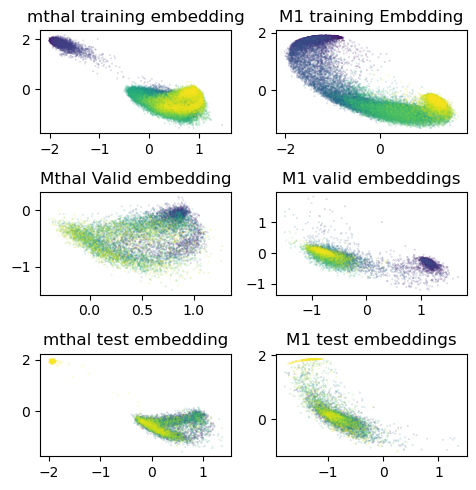

In [276]:
plt.figure(figsize=(5, 5))

index_order = (0,1)

# Creating each subplot in the 3x2 grid
ax1 = plt.subplot(321)  # First row, first column
ax2 = plt.subplot(322)  # First row, second column
ax3 = plt.subplot(323)  # Second row, first column
ax4 = plt.subplot(324)  # Second row, second column
ax5 = plt.subplot(325)  # Third row, first column
ax6 = plt.subplot(326)  # Third row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=train_x, embedding_labels='time', title='mthal training embedding')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_y, embedding_labels='time', title='M1 training Embdding')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=valid_x, embedding_labels='time', title='Mthal Valid embedding')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=valid_y, embedding_labels='time', title='M1 valid embeddings')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=test_x, embedding_labels='time', title='mthal test embedding')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=test_y, embedding_labels='time', title='M1 test embeddings')
plt.tight_layout()  # Adjust subplots to fit into figure area.


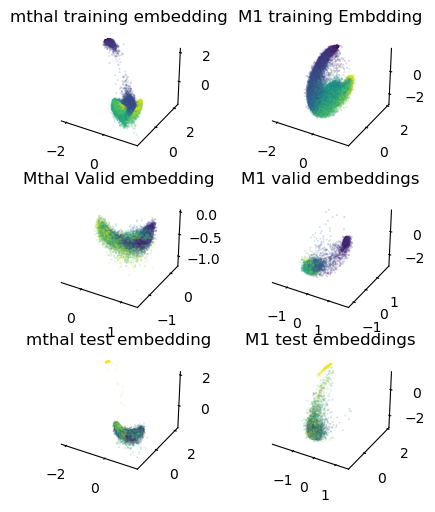

In [277]:
plt.figure(figsize=(5, 5))

index_order = (0,1,2)

# Creating each subplot in the 3x2 grid
ax1 = plt.subplot(321, projection='3d')  # First row, first column
ax2 = plt.subplot(322, projection='3d')  # First row, second column
ax3 = plt.subplot(323, projection='3d')  # Second row, first column
ax4 = plt.subplot(324, projection='3d')  # Second row, second column
ax5 = plt.subplot(325, projection='3d')  # Third row, first column
ax6 = plt.subplot(326, projection='3d')  # Third row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=train_x, embedding_labels='time', title='mthal training embedding')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_y, embedding_labels='time', title='M1 training Embdding')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=valid_x, embedding_labels='time', title='Mthal Valid embedding')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=valid_y, embedding_labels='time', title='M1 valid embeddings')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=test_x, embedding_labels='time', title='mthal test embedding')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=test_y, embedding_labels='time', title='M1 test embeddings')
plt.tight_layout()  # Adjust subplots to fit into figure area.


<Axes3D: title={'center': 'training M1 Target embeddings'}>

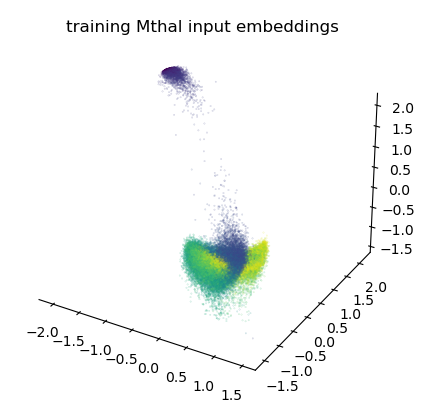

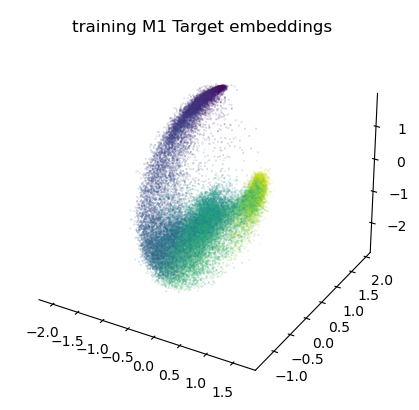

In [278]:

cebra.plot_embedding(embedding=train_x, embedding_labels='time', title='training Mthal input embeddings')
cebra.plot_embedding(embedding=train_y, embedding_labels='time', title='training M1 Target embeddings')

### 2. Construct RNN

In [279]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [280]:
# input = train_x
# target = train_y
# test_input = test_x
# test_target = test_y
# input.shape, target.shape, test_input.shape,  test_target.shape

In [281]:
print("Train X:", train_x.shape, train_x[0][0:3])
print("Train Y:", train_y.shape, train_y[0][0:3])
print("Validation X:", valid_x.shape, valid_x[0][0:3])
print("Validation Y:", valid_y.shape, valid_y[0][0:3])
print("Test X:", test_x.shape, test_x[0][0:3])
print("Test Y:", test_y.shape, test_y[0][0:3])
42812 + 9174 + 9174

Train X: (42812, 32) [-1.94654005  1.95700872  1.89580068]
Train Y: (42812, 32) [-1.43175758  1.83961171  0.62481901]
Validation X: (9174, 32) [ 0.69690096 -0.18203424 -0.55426014]
Validation Y: (9174, 32) [ 1.12311199 -0.15580671  0.84676925]
Test X: (9174, 32) [ 0.19322269 -0.63727423 -0.28299832]
Test Y: (9174, 32) [-0.9351895   0.00511005 -2.66102926]


61160

In [282]:
import torch

# Convert scaled and split data into PyTorch tensors
train_input_tensor = torch.tensor(train_x, dtype=torch.float32)
valid_input_tensor = torch.tensor(valid_x, dtype=torch.float32)
test_input_tensor = torch.tensor(test_x, dtype=torch.float32)

train_target_tensor = torch.tensor(train_y, dtype=torch.float32)
valid_target_tensor = torch.tensor(valid_y, dtype=torch.float32)
test_target_tensor = torch.tensor(test_y, dtype=torch.float32)


In [283]:
# # Now reshape input and target tensors for the training set
# train_input_tensor = torch.tensor(train_x)  # Reshape to (222, 210, 32)
# train_target_tensor = torch.tensor(train_y) # Reshape to (222, 210, 32)
# valid_input_tensor = torch.tensor(valid_x)
# valid_target_tensor = torch.tensor(valid_y)
# test_input_tensor = torch.tensor(test_x)
# test_target_tensor = torch.tensor(test_y)


# # Convert the existing tensors to float32 if they are not already
# input_tensor = train_input_tensor.float()
# target_tensor = train_target_tensor.float()
# valid_input_tensor = valid_input_tensor.float()
# valid_target_tensor = valid_target_tensor.float()
# test_input_tensor = test_input_tensor.float()
# test_target_tensor = test_target_tensor.float()


# Create a TensorDataset
train_dataset = TensorDataset(train_input_tensor, train_target_tensor)
val_dataset = TensorDataset(valid_input_tensor, valid_target_tensor)
test_dataset =  TensorDataset(test_input_tensor, test_target_tensor)


# Optionally create a validation dataset using the remaining data if needed
train_input_tensor.shape, train_target_tensor.shape, valid_input_tensor.shape, valid_target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

(torch.Size([42812, 32]),
 torch.Size([42812, 32]),
 torch.Size([9174, 32]),
 torch.Size([9174, 32]),
 torch.Size([9174, 32]),
 torch.Size([9174, 32]))

testing batching and randomizing inputs

In [284]:
# from torch.utils.data import Dataset, DataLoader
# import random

# class create_randomized_Datasets(Dataset):
#     def __init__(self, features, labels, sequence_length=7):
#         self.features = features
#         self.labels = labels
#         self.sequence_length = sequence_length

#     def __len__(self):
#         return len(self.labels) - self.sequence_length + 1

#     def __getitem__(self, index):
#         idx = random.randint(0, len(self.labels) - self.sequence_length)
#         print(idx)
#         return (self.features[idx:idx + self.sequence_length], self.labels[idx:idx + self.sequence_length])

# # Assuming 'features' and 'labels' are your full datasets
# train_dataset = create_randomized_Datasets(train_input_tensor, train_target_tensor)
# valid_dataset =  create_randomized_Datasets(valid_input_tensor, valid_target_tensor)
# test_dataset = create_randomized_Datasets(test_input_tensor, test_target_tensor)
# #train_loader = DataLoader(dataset, batch_size=1, shuffle=False)  # Shuffle here might not be necessary

# # Create DataLoaders
# batch_size = 64
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
# val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [285]:
# class create_nonRandom_datasets(Dataset):
#     def __init__(self, features, labels, sequence_length=220):
#         self.features = features
#         self.labels = labels
#         self.sequence_length = sequence_length
#         self.indices = [(i, i + sequence_length) for i in range(len(labels) - sequence_length + 1)]

#     def __len__(self):
#         return len(self.indices)

#     def __getitem__(self, index):
#         start, end = self.indices[index]
#         return self.features[start:end], self.labels[start:end]

# # Assuming 'features' and 'labels' are your full datasets
# train_dataset = create_nonRandom_datasets(train_input_tensor, train_target_tensor)
# valid_dataset =  create_nonRandom_datasets(valid_input_tensor, valid_target_tensor)
# test_dataset = create_nonRandom_datasets(test_input_tensor, test_target_tensor)

# #train_loader = DataLoader(dataset, batch_size=1, shuffle=False)  # Shuffle here might not be necessary

# # Create DataLoaders
# batch_size = 1
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [286]:
from torch.utils.data import Dataset, DataLoader
import torch

class ReachDataset(Dataset):
    def __init__(self, features, labels, sequence_length=220):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.sequence_length = sequence_length

    def __len__(self):
        # Calculate number of full reaches in the dataset
        return len(self.features) // self.sequence_length

    def __getitem__(self, index):
        # Get the full reach sequence
        start = index * self.sequence_length
        end = start + self.sequence_length
        return self.features[start:end], self.labels[start:end]

# Assuming 'features' and 'labels' are your full datasets
train_dataset = ReachDataset(train_input_tensor, train_target_tensor)
valid_dataset =  ReachDataset(valid_input_tensor, valid_target_tensor)
test_dataset = ReachDataset(test_input_tensor, test_target_tensor)
# Create DataLoader
batch_size = 16  # Adjust based on your system's memory and the model's capacity
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

C:\Users\user\AppData\Local\Temp\ipykernel_3068\287640335.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
C:\Users\user\AppData\Local\Temp\ipykernel_3068\287640335.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)


PyTorch rnn #1
- no dropouts

In [287]:
# # Adjusting the model for the specific neural data task
# class NeuralRNN(nn.Module):
#     def __init__(self, input_size=3, hidden_size=64, num_layers=1, output_size=1):
#         super(NeuralRNN, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.rnn(x, h0)
#         out = self.fc(out)  # Apply the linear layer to each time step
#         return out

# # Create an instance of the NeuralRNN
# neural_rnn = NeuralRNN()



pytorch rnn #2
- added drop outs

In [288]:
# input_size = len(train_input_tensor[1].detach().numpy())
# output_size = len(train_target_tensor[1].detach().numpy())
# print(input_size, output_size)

# class NeuralRNN(nn.Module):
#     def __init__(self, input_size=input_size, hidden_size=403, num_layers=1, output_size=output_size, dropout=0.1):
#         super(NeuralRNN, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         # Apply dropout to each RNN layer except the last layer
#         self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.rnn(x, h0)
#         out = self.fc(out)  # Apply the linear layer to each time step
#         return out

# # Create an instance of the NeuralRNN
# neural_rnn = NeuralRNN()

RNN #3

In [289]:
# input_size = len(train_input_tensor[1].detach().numpy())
# output_size = len(train_target_tensor[1].detach().numpy())
# print(input_size, output_size)

# class NeuralRNN(nn.Module):
#     def __init__(self, input_size=input_size, hidden_size=45, num_layers=2, output_size=output_size, dropout=0.1):
#         super(NeuralRNN, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.norm = nn.LayerNorm(hidden_size)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         _, (h_n, _) = self.lstm(x)  # We only care about the hidden state at the last time step
#         h_n = self.norm(h_n[-1])
#         out = self.fc(h_n[-1])
#         return out

# # Create an instance of the NeuralRNN
# neural_rnn = NeuralRNN()

Testing weather model

In [290]:
class NeuralRNN(nn.Module):
    def __init__(self, input_size=32, hidden_size=256, num_layers=1, output_size=32, dropout=0.2):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Apply dropout to each RNN layer except the last layer
        #self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        #self.rnn = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out)  # Apply the linear layer to each time step
        return out

# Create an instance of the NeuralRNN
neural_rnn = NeuralRNN()

In [291]:
class NeuralRNN(nn.Module):
    def __init__(self, input_size=32, hidden_size=64, num_layers=1, output_size=20, dropout=0.6):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, 
                            dropout=dropout if num_layers > 1 else 0)
        
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Initialize cell state with zeros
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Pass the output of the last time step to the classifier
        out = self.fc(out)
        
        return out
neural_rnn = NeuralRNN()

### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [292]:
num_epochs = 1000
lr = 0.0002
weight_decay = True
early_stop = True

# Initialize early stopping criteria
early_stopping_patience = 10
min_val_loss = float('inf')
stop_counter = 0

In [293]:
i = 0
for inputs, targets in train_loader:
    i +=1
    print(f'Epoch {i}')
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][0].shape, inputs[0][0])
    print(targets[0][0].shape, targets[0][0])
    break

Epoch 1
torch.Size([16, 220, 32])
torch.Size([16, 220, 32])
torch.Size([32]) tensor([-1.9100e+00,  1.9650e+00,  1.9121e+00, -1.1177e-01,  2.3944e-01,
         1.1768e-01, -8.8335e-02,  1.4962e-01, -1.6397e-01, -4.5540e-02,
        -2.0991e-01, -9.9823e-03,  2.2376e-02,  4.1631e-02, -4.1016e-02,
         2.0070e-01, -1.5174e-01, -5.2413e-02, -1.6877e-01,  9.5825e-02,
        -1.3343e-01, -6.8454e-02, -5.9474e-02,  6.7280e-02,  1.7288e-01,
         1.2671e-01,  1.4569e-01, -1.1560e-01, -1.4796e-01, -1.6074e-01,
         9.4625e-04,  1.3204e-01])
torch.Size([32]) tensor([-0.9046,  1.8436,  1.0603, -0.4224, -0.2036,  0.1568,  0.1972, -0.4642,
        -0.2169,  0.0383, -0.0297,  0.6539,  0.4306,  0.4547, -0.2499,  0.1466,
         0.1568, -0.3384, -0.1615,  0.2260, -0.4445, -0.0483, -0.5471,  0.7386,
        -1.0220,  0.5471,  0.5367, -0.5337,  0.4234,  0.2950, -0.1514,  0.0177])


In [294]:

for inputs, targets in val_loader:
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][1].shape, inputs[0][1])
    print(targets[0][1].shape, targets[0][1])
    break


torch.Size([16, 220, 32])
torch.Size([16, 220, 32])
torch.Size([32]) tensor([ 0.7019, -0.1589, -0.5227, -1.3524,  1.5731,  1.6995,  0.6327,  1.8489,
        -0.9920, -1.6398, -0.5859,  0.0065,  0.3860,  0.0891,  0.9964,  1.8415,
        -1.6877, -1.9722, -1.4755,  0.6753, -0.3573, -0.8530,  1.0053,  1.7422,
         1.1211, -0.3955, -0.4083, -1.4276, -1.2997,  0.6649, -1.4897, -0.7546])
torch.Size([32]) tensor([ 1.1121, -0.2170,  0.8237, -1.8451,  0.2789,  0.3534,  1.6347,  0.2394,
        -0.4346,  1.8229, -1.6050,  0.6329,  0.1661, -0.2268, -0.1435, -1.3014,
         1.3266,  1.7198, -0.9791, -0.9622, -2.0902, -1.1387, -1.5333, -0.3297,
        -1.1607, -1.7426,  0.7266,  1.3974,  1.8467, -1.5076,  1.9238, -1.7771])


In [295]:
for inputs, targets in test_loader:
    print(inputs.shape)
    print(targets.shape)
    print(inputs[0][1].shape, inputs[0][1])
    print(targets[0][1].shape, targets[0][1])
    break

torch.Size([16, 220, 32])
torch.Size([16, 220, 32])
torch.Size([32]) tensor([ 1.7352e-01, -7.5695e-01, -3.2153e-01, -5.9676e-01,  6.1379e-01,
         1.2969e-01, -2.5141e+00,  9.9165e-02, -1.0223e-01,  1.6058e+00,
        -1.5920e+00,  1.1851e-01,  1.4090e+00,  1.6053e+00, -1.3796e+00,
         2.6762e-01, -9.0935e-01,  9.2033e-01,  1.0784e+00,  1.1608e+00,
        -1.3708e+00, -1.7434e+00,  3.7912e-01,  9.4378e-04, -8.9387e-01,
         2.3365e+00,  2.2882e+00, -2.9786e-01, -1.5254e+00, -1.2309e+00,
         1.0713e+00,  7.2965e-01])
torch.Size([32]) tensor([-0.9827, -0.0420, -2.6208, -0.3276,  0.9854, -0.1221,  0.7579, -0.1405,
         0.9052,  0.4689, -0.5783,  0.4972, -0.6743,  0.2245, -1.3527, -0.0914,
         0.8862,  0.2391, -1.1669, -0.7884, -1.1941,  0.1149, -0.1450,  0.8578,
        -1.4372,  1.1900, -0.1925, -0.1534,  0.8711,  0.5058, -0.2809, -0.1562])


In [157]:
# Assuming neural_rnn is an instance of NeuralRNN
for inputs, targets in train_loader:
    print(f'Input shape: {inputs.shape}')
    print(f'Target shape: {targets.shape}')
    
    outputs = neural_rnn(inputs)
    
    print(f'Output shape: {outputs.shape}')
    break


Input shape: torch.Size([16, 220, 32])
Target shape: torch.Size([16, 220, 20])
Output shape: torch.Size([16, 220, 20])


Old training Loop

In [160]:
num_epochs = 100
lr = 0.001
weight_decay = False
early_stop = True

# Initialize early stopping criteria
early_stopping_patience = 20
min_val_loss = float('inf')
stop_counter = 0

Epoch 1 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 2 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 3 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 4 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 5 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 6 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 7 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 8 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 9 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 10 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 11 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 12 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 13 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 14 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 15 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 16 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 17 	Training Loss: 1.0212 	Validation Loss: 1.4341
Epoch 18 	Training Loss: 1.0212 	Validat

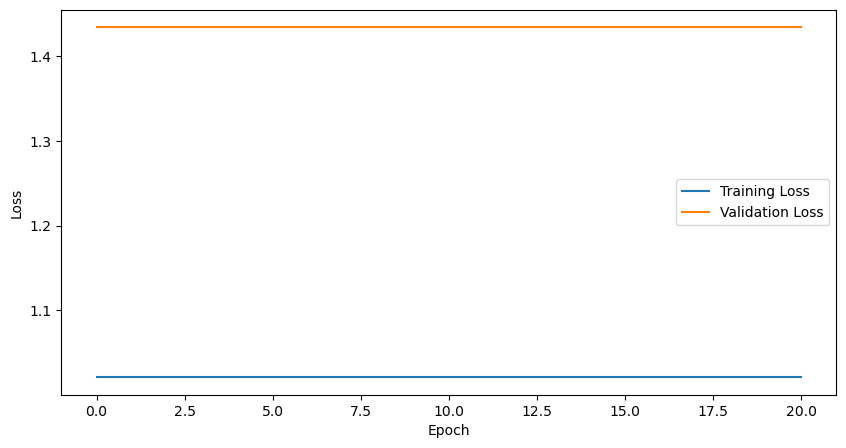

In [161]:
import torch
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task


optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr, weight_decay=0.05)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, min_lr=1e-5, verbose=True)


predictions = []
valid_predictions = []
weight_history = []
train_losses = []
val_losses = []

neural_rnn = NeuralRNN()
# Assuming neural_rnn, train_loader, and val_loader are already defined
for epoch in range(num_epochs):
    # Training phase
   
    neural_rnn.train()  # Set the model to training mode
    train_loss = 0.0
    all_outputs = []
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear the gradients
        outputs = neural_rnn(inputs)  # Forward pass: compute the output
        loss = loss_function(outputs, targets)
        loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step()  # Update parameters
        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation
        all_outputs.append(outputs)

        # Save weights
        layer_weights = {name: parameter.data.clone() for name, parameter in neural_rnn.named_parameters()}
        weight_history.append(layer_weights)
    all_outputs = torch.cat(all_outputs, dim=0)  # Concatenate along the batch dimension
    train_loss /= len(train_loader.dataset)  # Average loss for the epoch
    train_losses.append(train_loss)  # Store training loss


    # Validation phase
    neural_rnn.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    all_val_outputs = []
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        for inputs, targets in val_loader:
            outputs_val = neural_rnn(inputs)
            loss = loss_function(outputs_val, targets)
            val_loss += loss.item() * inputs.size(0)
            all_val_outputs.append(outputs_val)

    all_val_outputs = torch.cat(all_val_outputs, dim=0)  
    val_loss /= len(val_loader.dataset)  # Average loss for the epoch
    val_losses.append(val_loss)  # Store validation loss


      # Step the scheduler
    scheduler.step(val_loss)
    # # Early stopping check
    if early_stop:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            stop_counter = 0  # reset the counter if improvement is seen
        else:
            stop_counter += 1
        if stop_counter >= early_stopping_patience:
            # Reduce learning rate when a metric has stopped improving
            scheduler.step(val_loss)
            print(f"Stopping early at epoch {epoch+1}")
            break

    # Print epoch statistics every 100 epochs
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [105]:
output_predictions = all_outputs.detach().numpy()
print(output_predictions.shape)

# Reshape the data
output_predictions_flat = output_predictions.reshape(-1, 20)

# Check the new shape
print("New shape:", output_predictions_flat.shape)

discete_lables.shape, output_predictions_flat.shape
train_lables_discrete = discete_lables[0:42680]
train_lables_discrete.shape

train_target_tensor = train_target_tensor.detach().numpy()
train_target_tensor = train_target_tensor[0:42680]

(194, 220, 20)
New shape: (42680, 20)


AttributeError: 'numpy.ndarray' object has no attribute 'detach'

ValueError: Invalid embedding labels: the labels vector should have the same number of samples as the embedding, got 42680, expect 26675.

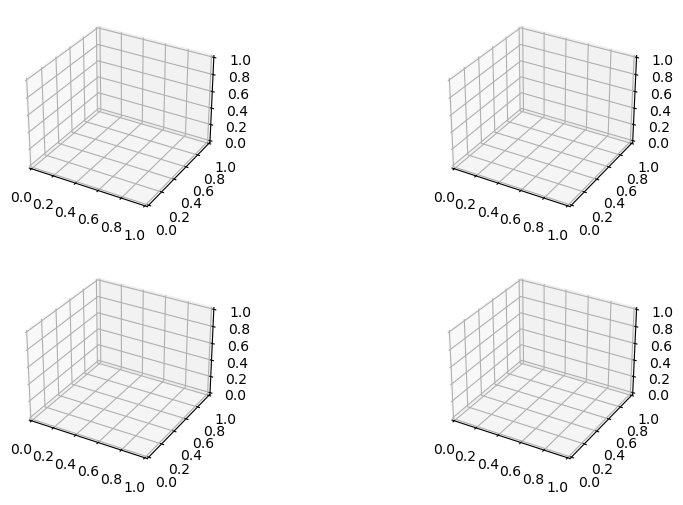

In [89]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,0], title='Target embedding Input ID')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

# Building an RNN to capture the weight changes

In [162]:

# # Assuming NeuralRNN is defined as follows
# class NeuralRNN(nn.Module):
#     def __init__(self, input_size=32, hidden_size=64, num_layers=1, output_size=32, dropout=0.6):
#         super(NeuralRNN, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
        
#         # Define the LSTM layer
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, 
#                             dropout=dropout if num_layers > 1 else 0)
        
#         # Define the fully connected layer
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x, return_states=False):
#         # Initialize hidden state with zeros
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         # Initialize cell state with zeros
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
#         # Forward propagate the LSTM
#         out, (hn, cn) = self.lstm(x, (h0, c0))
        
#         if return_states:
#             return self.fc(out), hn, cn
#         else:
#             return self.fc(out)

In [165]:
# num_epochs = 100
# lr = 0.001
# dropout = 0.6
# weight_decay = False
# early_stop = True

# # Initialize early stopping criteria
# early_stopping_patience = 20
# min_val_loss = float('inf')
# stop_counter = 0

Using device: cpu
Epoch 1 	Training Loss: 0.9984 	Validation Loss: 1.3853
Epoch 6 	Training Loss: 0.8720 	Validation Loss: 1.3764
Epoch 11 	Training Loss: 0.7822 	Validation Loss: 1.3992
Epoch 16 	Training Loss: 0.7543 	Validation Loss: 1.4121
Epoch 21 	Training Loss: 0.7427 	Validation Loss: 1.4138
Stopping early at epoch 23


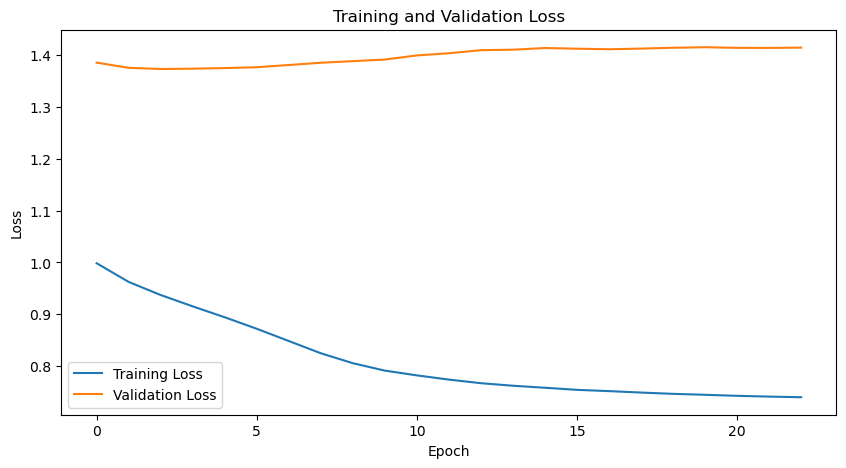

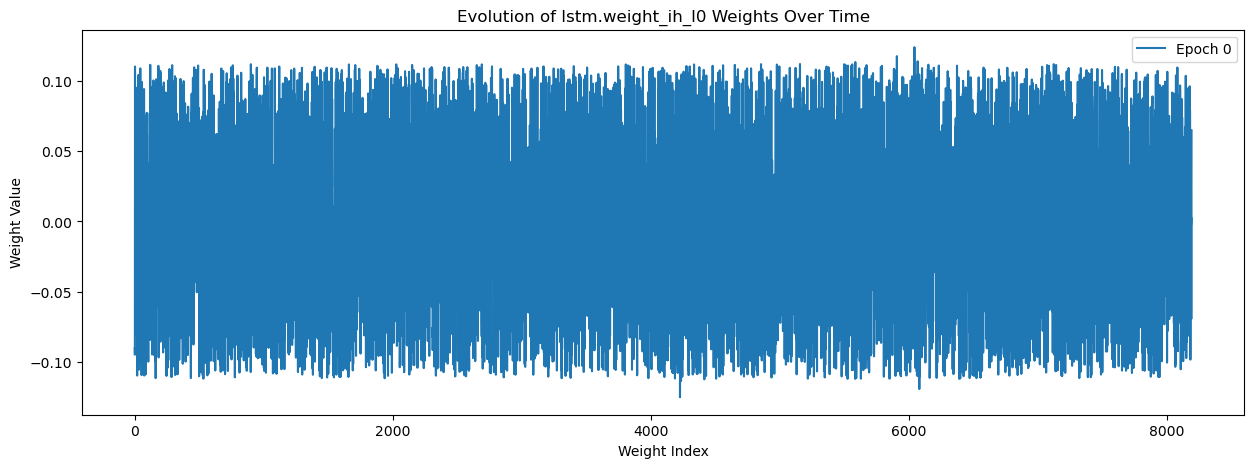

In [166]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import copy

    # Determine the device dynamically
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Assuming NeuralRNN and other components are defined
neural_rnn = NeuralRNN(input_size=32, hidden_size=64, num_layers=1, output_size=20, dropout=dropout).to(device)
# Initialize the optimizer
optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr, weight_decay=0.05)
# Scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, min_lr=1e-5, verbose=True)

# Training loop
early_stopping_patience = 20
min_val_loss = float('inf')
stop_counter = 0


train_losses = []
val_losses = []
weight_snapshots = {}
hidden_states = []
cell_states = []

for epoch in range(num_epochs):
    neural_rnn.train()
    train_loss = 0.0
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = neural_rnn(inputs)
        loss = nn.MSELoss()(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        
        if epoch % 5 == 0:
            _, hn, cn = neural_rnn(inputs, return_states=True)
            hidden_states.append(hn.cpu().detach().numpy())
            cell_states.append(cn.cpu().detach().numpy())
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    neural_rnn.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = neural_rnn(inputs)
            loss = nn.MSELoss()(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if epoch % 5 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        stop_counter = 0
    else:
        stop_counter += 1

    if stop_counter >= early_stopping_patience:
        print(f"Stopping early at epoch {epoch+1}")
        break

    if epoch % 5 == 0:
        for name, param in neural_rnn.named_parameters():
            if name not in weight_snapshots:
                weight_snapshots[name] = []
            weight_snapshots[name].append(copy.deepcopy(param.data.cpu()))

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Example: Plot weight changes
plt.figure(figsize=(15, 5))
layer_name = 'lstm.weight_ih_l0'
for i, epoch_weights in enumerate(weight_snapshots[layer_name]):
    if i % 5 == 0:
        plt.plot(epoch_weights.flatten(), label=f'Epoch {i*5}')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title(f'Evolution of {layer_name} Weights Over Time')
plt.legend()
plt.show()



In [167]:
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# import numpy as np
# import copy

# class NeuralRNN(nn.Module):
#     def __init__(self, input_size=32, hidden_size=64, num_layers=1, output_size=20, dropout=0.5):
#         super(NeuralRNN, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
        
#         # Define the LSTM layer
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, 
#                             dropout=dropout if num_layers > 1 else 0)
        
#         # Define the fully connected layer
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x, return_states=True):
#         # Initialize hidden state with zeros
#         h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         # Initialize cell state with zeros
#         c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
#         # Forward propagate the LSTM
#         out, (hn, cn) = self.lstm(x, (h0, c0))
        
#         if return_states:
#             return self.fc(out), hn, cn
#         else:
#             return self.fc(out)

# # Determine the device dynamically
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print("Using device:", device)

# neural_rnn = NeuralRNN(input_size=32, hidden_size=64, num_layers=1, output_size=20, dropout=0.6).to(device)

# optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.001, weight_decay=0.05)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, min_lr=1e-5, verbose=True)

# # Early stopping and other hyperparameters
# early_stopping_patience = 20
# min_val_loss = float('inf')
# stop_counter = 0

# num_epochs = 100

# train_losses = []
# val_losses = []
# weight_snapshots = {}

# # Lists to store the predictions for all data after each epoch
# all_train_predictions = []
# all_val_predictions = []

# for epoch in range(num_epochs):
#     neural_rnn.train()
#     train_loss = 0.0
#     epoch_train_predictions = []
    
#     for inputs, targets in train_loader:
#         inputs, targets = inputs.to(device), targets.to(device)
        
#         optimizer.zero_grad()
#         outputs = neural_rnn(inputs)
#         loss = nn.MSELoss()(outputs, targets)
#         loss.backward()
#         optimizer.step()
        
#         train_loss += loss.item() * inputs.size(0)
#         epoch_train_predictions.append(outputs.detach().cpu().numpy())
#         print(epoch_train_predictions.shape)
#         print
    
#     # Concatenate the list of arrays along the first dimension to form (n_reaches, time_bins, embeddings)
#     epoch_train_predictions = np.concatenate(epoch_train_predictions, axis=0)
#     all_train_predictions.append(epoch_train_predictions)
    
#     train_loss /= len(train_loader.dataset)
#     train_losses.append(train_loss)

#     neural_rnn.eval()
#     val_loss = 0.0
#     epoch_val_predictions = []
    
#     with torch.no_grad():
#         for inputs, targets in val_loader:
#             inputs, targets = inputs.to(device), targets.to(device)
            
#             outputs = neural_rnn(inputs)
#             loss = nn.MSELoss()(outputs, targets)
#             val_loss += loss.item() * inputs.size(0)
#             epoch_val_predictions.append(outputs.detach().cpu().numpy())
    
#     # Concatenate the list of arrays along the first dimension
#     epoch_val_predictions = np.concatenate(epoch_val_predictions, axis=0)
#     all_val_predictions.append(epoch_val_predictions)
    
#     val_loss /= len(val_loader.dataset)
#     val_losses.append(val_loss)

#     scheduler.step(val_loss)

#     if epoch % 5 == 0:
#         print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')

#     if val_loss < min_val_loss:
#         min_val_loss = val_loss
#         stop_counter = 0
#     else:
#         stop_counter += 1

#     if stop_counter >= early_stopping_patience:
#         print(f"Stopping early at epoch {epoch+1}")
#         break

#     if epoch % 5 == 0:
#         for name, param in neural_rnn.named_parameters():
#             if name not in weight_snapshots:
#                 weight_snapshots[name] = []
#             weight_snapshots[name].append(copy.deepcopy(param.data.cpu()))

# # Concatenate all epochs' predictions into a single array
# train_predictions = np.concatenate(all_train_predictions, axis=0)
# val_predictions = np.concatenate(all_val_predictions, axis=0)

# # Reshape to (n_reaches * time_bins, embeddings)
# train_flat_predictions = train_predictions.reshape(-1, train_predictions.shape[2])
# val_flat_predictions = val_predictions.reshape(-1, val_predictions.shape[2])

# # Print shapes to verify
# print("Final training predictions shape:", train_flat_predictions.shape)
# print("Final validation predictions shape:", val_flat_predictions.shape)

# # Plot training and validation losses
# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()


Using device: cpu


AttributeError: 'tuple' object has no attribute 'size'

Using device: cpu
train
[ 0.13047066  0.11020619 -0.00164387  0.10636088 -0.0549542  -0.05669478
 -0.0497417   0.04705344  0.12760814  0.13366331  0.09403232  0.01325597
  0.0427159   0.05945173 -0.06753368  0.1333581   0.00797233 -0.109472
  0.11124046 -0.0170203   0.1190802  -0.15833569 -0.05161577  0.00128091
  0.05999867 -0.12445052 -0.02185156  0.07259336  0.09596256 -0.09271073
  0.07009905  0.12105118]
(1, 194, 220, 32)
(2, 220, 32)
val
(1, 41, 220, 32)
[ 0.10381076  0.12303231  0.07338526  0.06688176 -0.10806412 -0.03532192
 -0.08789107  0.07057874  0.14120781  0.09625161  0.09312961 -0.02875717
  0.00737409  0.03580563 -0.03242491  0.09213008 -0.05288446 -0.0746173
  0.08056518 -0.01529408  0.02257992 -0.12136181 -0.01448742 -0.03904923
  0.07750893 -0.0124074   0.02724232  0.01853761  0.04397493 -0.03300393
  0.06069116  0.16481584]
(9, 220, 32)
Epoch 1 	Training Loss: 1.0043 	Validation Loss: 1.2140
train
[ 0.13047066  0.11020619 -0.00164387  0.10636088 -0.0549542  -0.056694

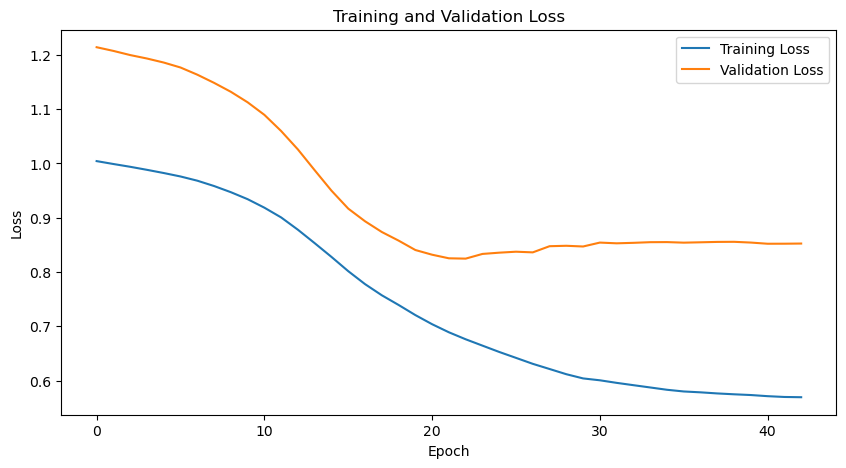

In [322]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import copy

class NeuralRNN(nn.Module):
    def __init__(self, input_size=32, hidden_size=64, num_layers=1, output_size=32, dropout=0.5):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, 
                            dropout=dropout if num_layers > 1 else 0)
        
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, return_states=False):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Initialize cell state with zeros
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate the LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        if return_states:
            return self.fc(out), hn, cn
        else:
            return self.fc(out)

# Determine the device dynamically
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

neural_rnn = NeuralRNN(input_size=32, hidden_size=64, num_layers=2, output_size=32, dropout=0.4).to(device)

optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, min_lr=1e-5, verbose=True)

# Early stopping and other hyperparameters
early_stopping_patience = 20
min_val_loss = float('inf')
stop_counter = 0

num_epochs = 100

train_losses = []
val_losses = []
weight_snapshots = {}

# Lists to store the predictions for all data after each epoch
all_train_predictions = []
all_val_predictions = []

for epoch in range(num_epochs):
    neural_rnn.train()
    train_loss = 0.0
    epoch_train_predictions = []
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = neural_rnn(inputs)
        loss = nn.MSELoss()(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        epoch_train_predictions.append(outputs.detach().cpu().numpy())
    
    # Concatenate the list of arrays along the first dimension to form (n_reaches, time_bins, embeddings)
    epoch_train_predictions = np.concatenate(epoch_train_predictions, axis=0)
    all_train_predictions.append(epoch_train_predictions)
    all_train_predictions_array = np.array(all_train_predictions)
    # print('train')
    # print(all_train_predictions_array[0,50,50,:])
    # print(all_train_predictions_array.shape)
    # print(targets.detach().numpy().shape)
    # print(targets[50,50,:])
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    neural_rnn.eval()
    val_loss = 0.0
    epoch_val_predictions = []
    
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = neural_rnn(inputs)
            loss = nn.MSELoss()(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
            epoch_val_predictions.append(outputs.detach().cpu().numpy())
    
    # Concatenate the list of arrays along the first dimension
    epoch_val_predictions = np.concatenate(epoch_val_predictions, axis=0)
    all_val_predictions.append(epoch_val_predictions)
    all_val_predictions_array = np.array(all_val_predictions)
    # print('val')
    # print(all_val_predictions_array.shape)
    # print(all_val_predictions_array[0,25,50,:])
    # print(targets.detach().numpy().shape)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    scheduler.step(val_loss)

    if epoch % 5 == 0:
        print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {val_loss:.4f}')

    if val_loss < min_val_loss:
        min_val_loss = val_loss
        stop_counter = 0
    else:
        stop_counter += 1

    if stop_counter >= early_stopping_patience:
        print(f"Stopping early at epoch {epoch+1}")
        break

    if epoch % 5 == 0:
        for name, param in neural_rnn.named_parameters():
            if name not in weight_snapshots:
                weight_snapshots[name] = []
            weight_snapshots[name].append(copy.deepcopy(param.data.cpu()))

# # Concatenate all epochs' predictions into a single array
# train_predictions = np.concatenate(all_train_predictions, axis=0)
# val_predictions = np.concatenate(all_val_predictions, axis=0)

# Reshape to (n_reaches * time_bins, embeddings)
# train_flat_predictions = train_predictions.reshape(-1, train_predictions.shape[2])
# val_flat_predictions = val_predictions.reshape(-1, val_predictions.shape[2])

# Print shapes to verify
print("Final training predictions shape:", all_train_predictions_array.shape)
print("Final validation predictions shape:", all_val_predictions_array.shape)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [323]:
from datetime import datetime

num_epochs = 43 # HOW MANY EPOCHS DID IT RUN BEFORE IT AUTO STOPPED 

# Get the current date and time formatted as a string (e.g., "2023-03-28_15-30-45")
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

rnn_save_path = f'rnn_models/rnn_model_{num_epochs}_{mouse}_{current_datetime}.pth'
# Saving the model
torch.save(neural_rnn.state_dict(), rnn_save_path)


In [324]:

# Parameters must match those of the model you're loading
input_size = 32
hidden_size = 64
num_layers = 2  # This needs to match the saved model
output_size = 32  # This needs to match the saved model
dropout = 0.1

num_epochs = 100  # Update this based on your actual training epochs before early stopping

# Use the same parameters as the original model
neural_rnn_loaded = NeuralRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size, dropout=dropout).to(device)

# Loading the model
# Loading the model with the same architecture
neural_rnn_loaded = NeuralRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size, dropout=dropout).to(device)
neural_rnn_loaded.load_state_dict(torch.load(rnn_save_path))
neural_rnn_loaded.eval()  # Set it to evaluation mode if only doing inference

# If you want to continue training, switch back to train mode
neural_rnn_loaded.train()

NeuralRNN(
  (lstm): LSTM(32, 64, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=64, out_features=32, bias=True)
)

In [325]:

# Example of reshaping
epoch_predictions = all_train_predictions_array[-1]  # This has shape (194, 220, 20)
epoch_valid_prediction = all_val_predictions_array[-1]

flattened_predictions = epoch_predictions.reshape(-1, epoch_predictions.shape[2])
flattened_valid_predictions = epoch_valid_prediction.reshape(-1, epoch_valid_prediction.shape[2])

# Now, flattened_predictions has shape (194 * 220, 20), which should be (42680, 20)
print("Flattened predictions shape:", flattened_predictions.shape)
print("Flattened valid predictions shape:", flattened_valid_predictions.shape)


Flattened predictions shape: (42680, 32)
Flattened valid predictions shape: (9020, 32)


In [326]:
discete_lables.shape, output_predictions_flat.shape
train_lables_discrete = discete_lables[0:42680]
train_lables_discrete.shape


vaild_target_tensor = valid_target_tensor.detach().numpy()


train_target_tensor = train_target_tensor
train_target_tensor = train_target_tensor[0:42680]


In [327]:
# split the discete_lables 
train_labels = discete_lables[:train_size]
valid_labels_reshapped_for_rnn_prediction = valid_labels[0:flattened_valid_predictions.shape[0],:]
valid_labels_reshapped_for_target = valid_labels[0:vaild_target_tensor.shape[0],:]


Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

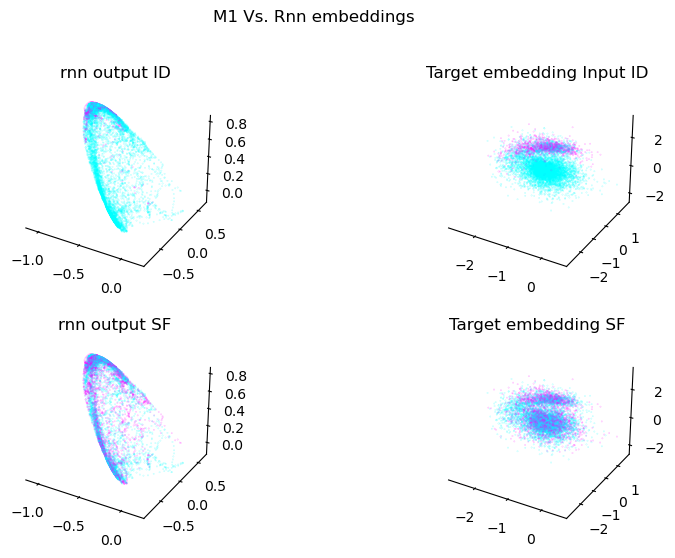

In [328]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)
index_order = (3,4,5)



#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=flattened_valid_predictions, embedding_labels=valid_labels_reshapped_for_rnn_prediction[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=vaild_target_tensor, embedding_labels=valid_labels_reshapped_for_target[:,0], title='Target embedding Input ID')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=flattened_valid_predictions, embedding_labels=valid_labels_reshapped_for_rnn_prediction[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=vaild_target_tensor, embedding_labels=valid_labels_reshapped_for_target[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

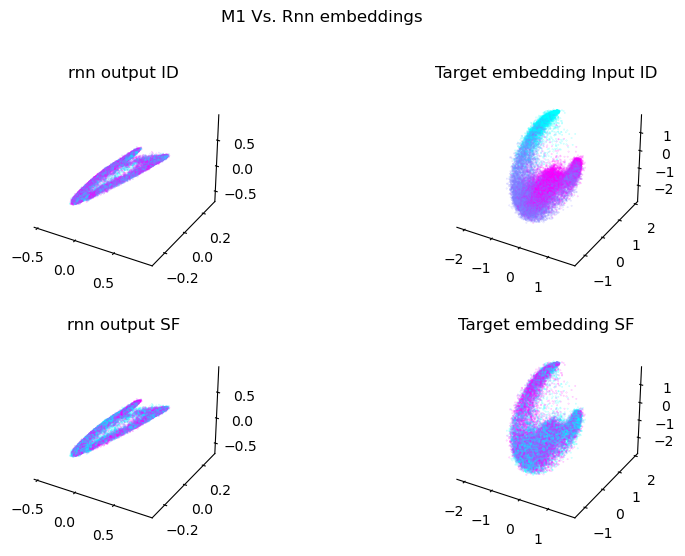

In [330]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=flattened_predictions, embedding_labels=train_lables_discrete[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,0], title='Target embedding Input ID')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=flattened_predictions, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

### 4. Test rnn on unseen data

create dataloader for unseen test data (data witheld from both training and validation)

In [307]:
class FullSequenceDataset(Dataset):
    def __init__(self, features, labels):
        # Ensure data is in the correct shape [1, seq_length, feature_size]
        self.features = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(0)      # Add batch dimension

    def __len__(self):
        return 1  # We have only one batch in this dataset

    def __getitem__(self, index):
        # Return the whole sequence
        return self.features[index], self.labels[index]

test_dataset = FullSequenceDataset(test_input_tensor, test_target_tensor)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # No need to shuffle, only one batch



C:\Users\user\AppData\Local\Temp\ipykernel_3068\1057171156.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
C:\Users\user\AppData\Local\Temp\ipykernel_3068\1057171156.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(0)      # Add batch dimension


In [308]:
test_input_tensor.shape, test_target_tensor.shape

(torch.Size([9174, 32]), torch.Size([9174, 32]))

In [309]:
for inputs, targets in test_loader:
    print("Inputs shape:", inputs.shape)  # Expected: torch.Size([1, 9174, 32])
    print("Targets shape:", targets.shape)  # Expected: torch.Size([1, 9174, 20])

    # Additionally, check individual timestep data if needed:
    print("Single input timestep shape:", inputs[0][1].shape)  # Should print the shape of the feature vector: torch.Size([32])
    print("Single input timestep data:", inputs[0][1])  # Data of the features at timestep 2
    print("Single target timestep shape:", targets[0][1].shape)  # Should print the shape of the target vector: torch.Size([20])
    print("Single target timestep data:", targets[0][1])  # Data of the targets at timestep 2
    break  # Since all data is in one batch, no need to loop further


Inputs shape: torch.Size([1, 9174, 32])
Targets shape: torch.Size([1, 9174, 32])
Single input timestep shape: torch.Size([32])
Single input timestep data: tensor([ 1.7352e-01, -7.5695e-01, -3.2153e-01, -5.9676e-01,  6.1379e-01,
         1.2969e-01, -2.5141e+00,  9.9165e-02, -1.0223e-01,  1.6058e+00,
        -1.5920e+00,  1.1851e-01,  1.4090e+00,  1.6053e+00, -1.3796e+00,
         2.6762e-01, -9.0935e-01,  9.2033e-01,  1.0784e+00,  1.1608e+00,
        -1.3708e+00, -1.7434e+00,  3.7912e-01,  9.4378e-04, -8.9387e-01,
         2.3365e+00,  2.2882e+00, -2.9786e-01, -1.5254e+00, -1.2309e+00,
         1.0713e+00,  7.2965e-01])
Single target timestep shape: torch.Size([32])
Single target timestep data: tensor([-0.9827, -0.0420, -2.6208, -0.3276,  0.9854, -0.1221,  0.7579, -0.1405,
         0.9052,  0.4689, -0.5783,  0.4972, -0.6743,  0.2245, -1.3527, -0.0914,
         0.8862,  0.2391, -1.1669, -0.7884, -1.1941,  0.1149, -0.1450,  0.8578,
        -1.4372,  1.1900, -0.1925, -0.1534,  0.8711,  0.

Run a single pass of the already trained rnn on this unseen data
- makes prediction on unseen data (does not update the rnn in anyway)

Overall Mean Squared Error Loss: 1.037829875946045
MSE for embedding 0: 1.240386962890625
MSE for embedding 1: 0.22961226105690002
MSE for embedding 2: 6.008168697357178
MSE for embedding 3: 0.7358947992324829
MSE for embedding 4: 0.47588464617729187
MSE for embedding 5: 0.6618783473968506
MSE for embedding 6: 1.533071517944336
MSE for embedding 7: 0.3704586625099182
MSE for embedding 8: 0.6693012714385986
MSE for embedding 9: 0.7585001587867737
MSE for embedding 10: 1.146141767501831
MSE for embedding 11: 0.23612099885940552
MSE for embedding 12: 0.5502529740333557
MSE for embedding 13: 0.29919084906578064
MSE for embedding 14: 1.642820119857788
MSE for embedding 15: 0.6391634345054626
MSE for embedding 16: 2.09799861907959
MSE for embedding 17: 0.8644980788230896
MSE for embedding 18: 2.006258726119995
MSE for embedding 19: 1.3787184953689575
MSE for embedding 20: 1.5889670848846436
MSE for embedding 21: 0.20708540081977844
MSE for embedding 22: 0.3099232614040375
MSE for embedding 2

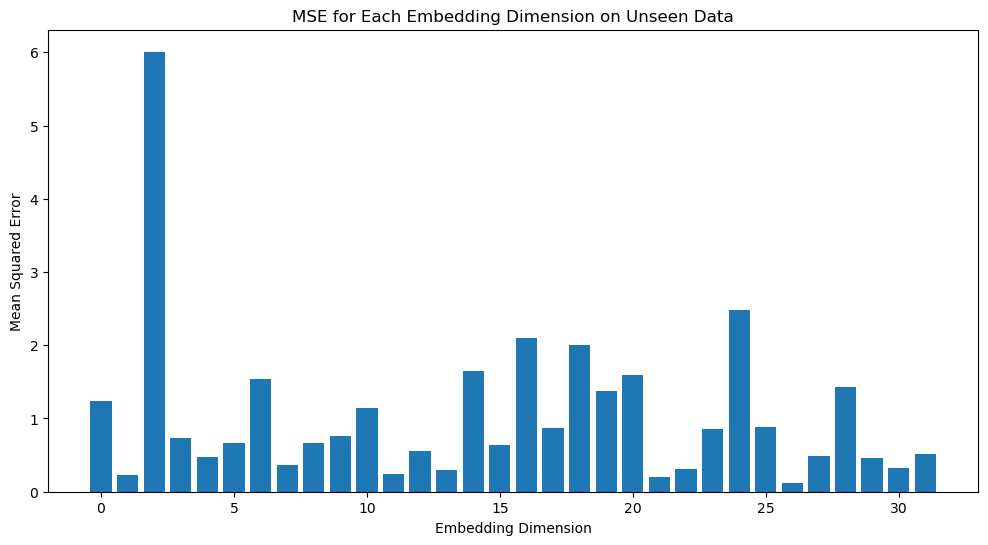

In [331]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

# Assuming neural_rnn_loaded is already loaded and set to evaluation mode
neural_rnn_loaded.eval()

# Directly access the full sequence since you know you have one full batch
inputs, targets = next(iter(test_loader))
inputs, targets = inputs.to(device), targets.to(device)

with torch.no_grad():
    outputs = neural_rnn_loaded(inputs)
    mse_loss = nn.MSELoss()
    loss = mse_loss(outputs, targets)
    print("Overall Mean Squared Error Loss:", loss.item())

# Calculate MSE for each embedding dimension
mse_per_embedding = []
for i in range(outputs.shape[2]):  # Loop across the embedding dimension
    mse = mse_loss(outputs[0, :, i], targets[0, :, i]).item()
    mse_per_embedding.append(mse)
    print(f"MSE for embedding {i}: {mse}")

# Visualize the MSE across all embeddings
plt.figure(figsize=(12, 6))
plt.bar(range(len(mse_per_embedding)), mse_per_embedding)
plt.xlabel('Embedding Dimension')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Embedding Dimension on Unseen Data')
plt.show()


Working Eval loop

In [335]:
# neural_rnn.eval()  # Set the model to evaluation mode
# test_predictions = []

# with torch.no_grad():  # No gradients needed for evaluation, which saves memory and computations
#     for inputs, targets in test_loader:
#         print(inputs.shape)
#         print(targets.shape)
#         outputs = neural_rnn(inputs)  # Generate predictions
#         print(outputs.shape)
#         # Initialize the MSE loss function
#         mse_loss = nn.MSELoss()
#         # Calculate the MSE
#         loss = mse_loss(outputs, targets)
#         # Print the MSE loss
#         print("Overall Mean Squared Error Loss:", loss.item())
#         # Assuming the last dimension of your tensors is the embedding dimension (32 embeddings)
#         num_embeddings = outputs.shape[-1]

#         # Loop through each embedding dimension and calculate MSE
#         mse_per_embedding = []
#         for i in range(num_embeddings):
#             # Select the data for the current embedding across all time bins
#             output_emb = outputs[:, :, i]
#             target_emb = targets[:, :, i]

#             # Calculate the MSE for the current embedding
#             loss = mse_loss(output_emb, target_emb)
#             mse_per_embedding.append(loss.item())

#             # Optionally, print the MSE for each embedding
#             print(f"MSE for embedding {i}: {loss.item()}")

#         # If needed, convert the list to a tensor for further analysis or operations
#         mse_per_embedding_tensor = torch.tensor(mse_per_embedding)
        
# outputs

In [336]:
outputs= outputs.detach().numpy()
rnn_predictions = outputs
rnn_predictions.shape

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [337]:
# from sklearn.metrics import mean_squared_error

# # Flatten the predictions and targets to compute the overall MSE
# mse = mean_squared_error(outputs.view(-1).cpu().numpy(), test_predictions.view(-1).cpu().numpy())
# print("Test Mean Squared Error:", mse)


In [338]:
test_y.shape

(9174, 32)

In [339]:
rnn_predictions_embedding_3d  = rnn_predictions[0, :, :]
test_target_embedding_3d  = test_y[:, :]
rnn_predictions.shape, test_target_embedding_3d.shape

((1, 9174, 32), (9174, 32))

In [340]:
label_test_split = discete_lables[51986:]
label_test_split.shape

(9174, 2)

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

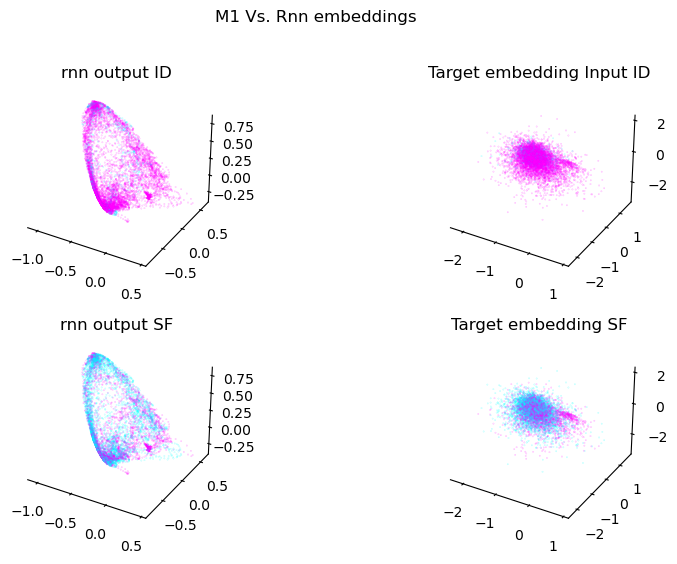

In [343]:
plt.figure(figsize=(10, 6))

index_orde_rnn = (0,1,2)
index_orde_rnn = (3,4,5)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_orde_rnn,embedding=rnn_predictions_embedding_3d, embedding_labels=label_test_split[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order_test_y,embedding=test_target_embedding_3d, embedding_labels=label_test_split[:,0], title='Target embedding Input ID')

ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_orde_rnn,embedding=rnn_predictions_embedding_3d, embedding_labels=label_test_split[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order_test_y,embedding=test_target_embedding_3d, embedding_labels=label_test_split[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

In [349]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]

        embedding_1_rnn =  rnn_predictions[0, :, 3][reach_start:reach_end]
        embedding_2_rnn =  rnn_predictions[0, :, 1][reach_start:reach_end]
        embedding_3_rnn =  rnn_predictions[0, :, 2][reach_start:reach_end]

        # embedding_1_m1 = test_targets[0, :, 0].detach().numpy()[reach_start:reach_end]
        # embedding_2_m1 = test_targets[0, :, 1].detach().numpy()[reach_start:reach_end]
        # embedding_3_m1 = test_targets[0, :, 2].detach().numpy()[reach_start:reach_end]

        
        embedding_1_m1 = test_y[:,3][reach_start:reach_end]
        embedding_2_m1 = test_y[:,1][reach_start:reach_end]
        embedding_3_m1 = test_y[:,2][reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1_rnn, label=f'Reach {reach}')
        ax5.plot(embedding_2_rnn, label=f'Reach {reach}')
        ax6.plot(embedding_3_rnn,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1_rnn, embedding_2_rnn, embedding_3_rnn, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Mtahl Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mtahl Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mtahl Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Rnn Prediction 1st Embedding")
    ax5.set_title("Rnn Prediction 2nd Embedding")
    ax6.set_title("Rnn Prediction 3rd Embedding")

    ax7.set_title("M1 1st Embedding")
    ax8.set_title("M1 2nd Embedding")
    ax9.set_title("M1 3rd Embedding")

    ax10.set_title("Rnn 3D Embedding")
    ax11.set_title("M1 3D Embedding")


    # Overall title for the figure
    fig.suptitle(f'Checking top 3 embeddings for M1 and Mthal at spefici reachs')

    # Show the plot
    plt.show()

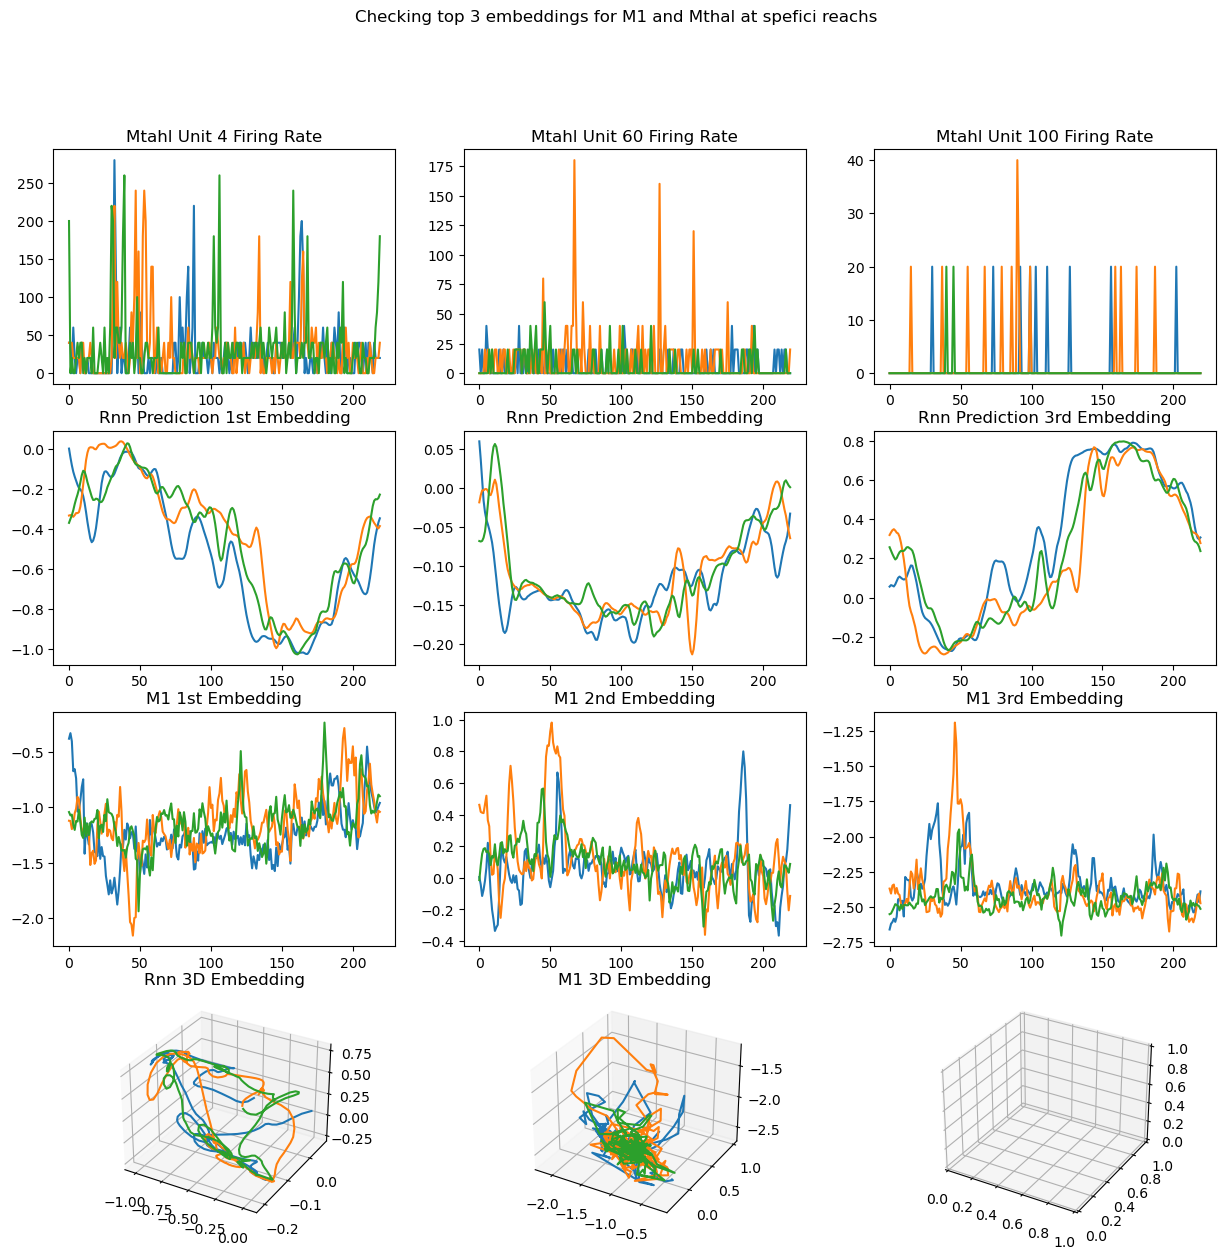

In [351]:
# Units to view
unit_to_view = 4
second_unit_to_view = 60  # Second unit to display
third_unit_to_view = 100
reaches_to_view = range(0, 3)  # Range of reaches to display

view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view)

In [221]:
rnn_predictions.shape,rnn_predictions[0, :, 0].shape, test_y.shape, test_y[:,0].shape


((1, 9174, 20), (9174,), (9174, 20), (9174,))

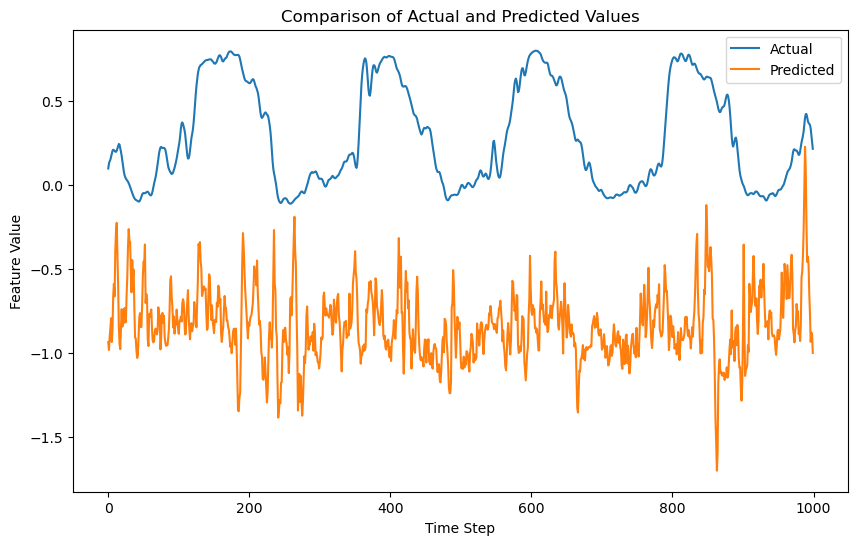

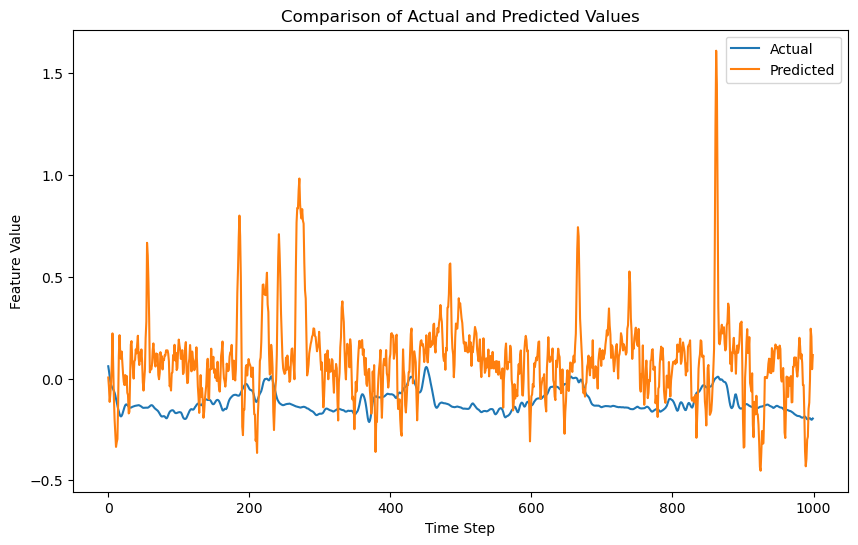

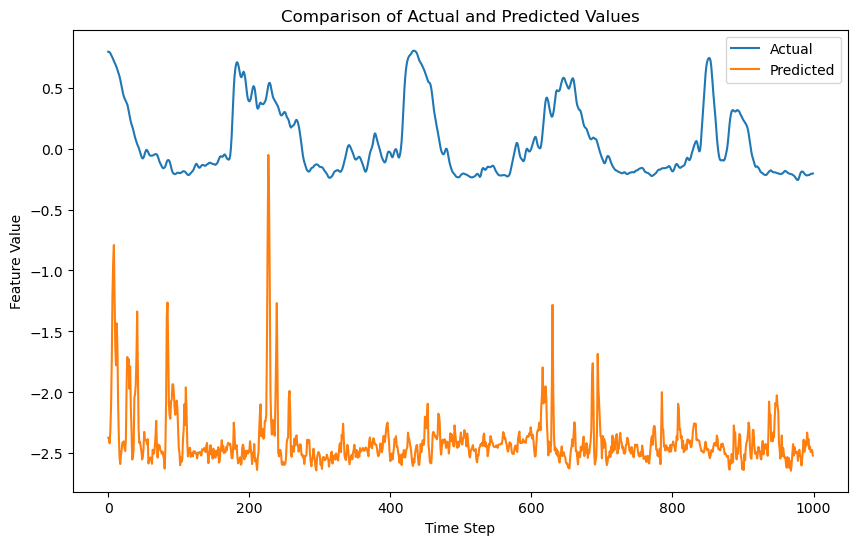

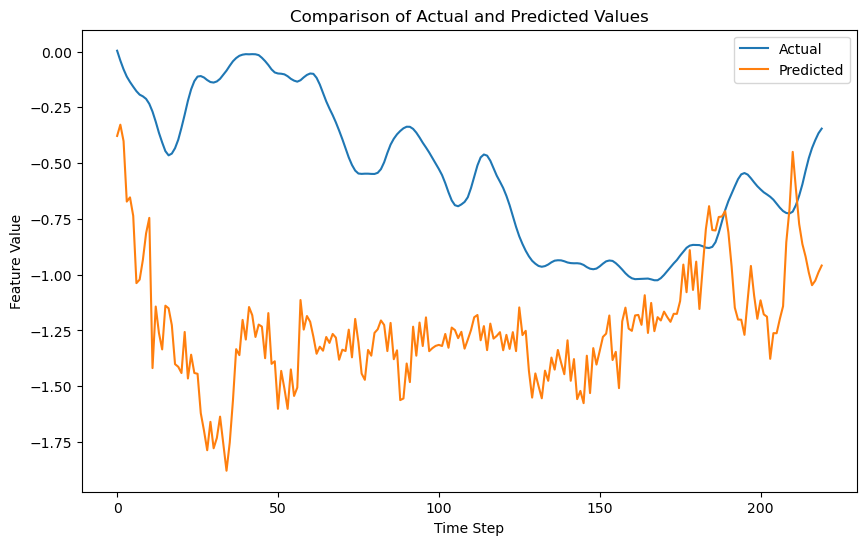

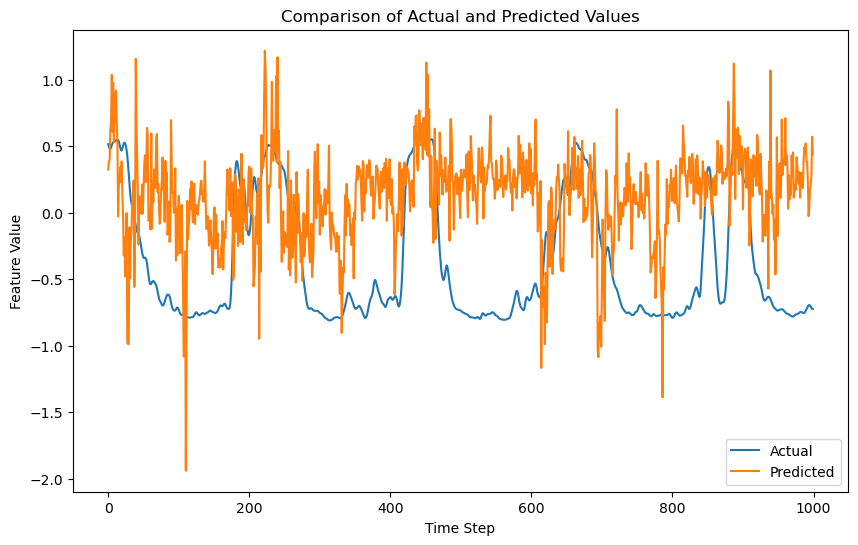

In [352]:
import matplotlib.pyplot as plt

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 0][0:1000], label='Actual')
plt.plot(test_y[:,0][0:1000], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 1][0:1000], label='Actual')
plt.plot(test_y[:,1][0:1000], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 2][1500:2500], label='Actual')
plt.plot(test_y[:,2][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 3][0:220], label='Actual')
plt.plot(test_y[:,3][0:220], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 4][1500:2500], label='Actual')
plt.plot(test_y[:,4][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()




### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error